In [1766]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1817]:
import numpy as np
## Figures
folder = 'results/r_mn05_2'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)


In [1805]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [1818]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [1819]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])

        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>n-3500:
                print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept = np.mean( y - x )
  
            ####
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                #r2s[i] = sklearn.metrics.mean_gamma_deviance(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.mean_absolute_error(np.exp(y.reshape(-1,1)),np.exp(y2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = intercept
                dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1819-a20dd9741d83>:15: RuntimeWarning: di

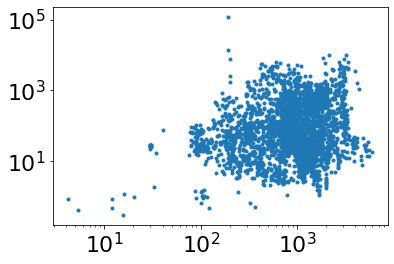

In [1420]:
plt.plot(a['bio12'],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(a['bio12'][:len(a)],np.log10(a['maxr2'])-np.log10(a['ebe_mmkyr']/1000),'.')
plt.xscale('log')

<ipython-input-1788-5fa10ffa3200>:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim( [0,100000] )


(0.8912509381337456, 100000)

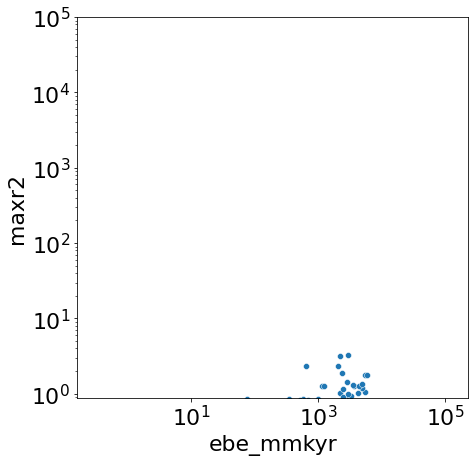

In [1788]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot( data=a, x='ebe_mmkyr', y='maxr2' )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.ylim( [0,100000] )

829.3490017794023

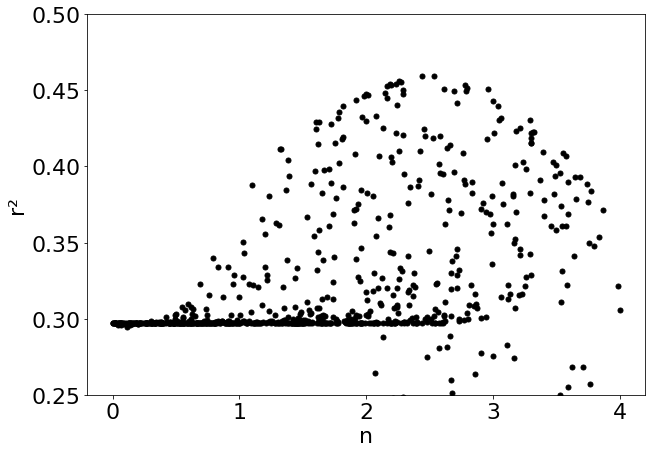

In [1808]:
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(ns,r2s,'.k',markersize=10)
#plt.xscale('log')
plt.xlabel('n')
plt.ylabel('r'+ '2'.translate(superscript))
plt.ylim([.25,.5])
diffus[np.argmin(resid)]/ks[np.argmin(resid)]

In [1794]:
ns[np.argmax(r2s)]*.4

0.9740035530149556

Text(0.5, 0, 'D/k ratio')

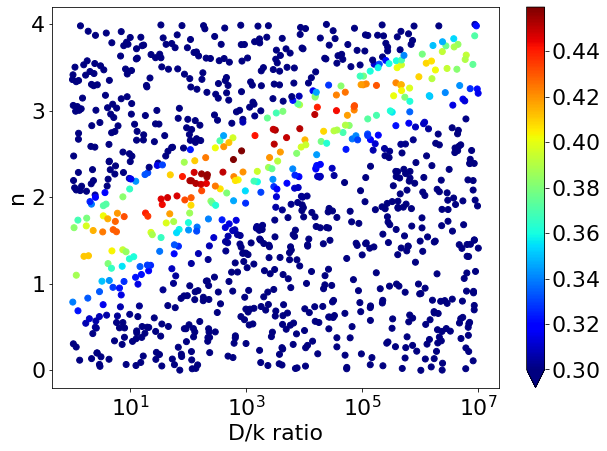

In [1809]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')


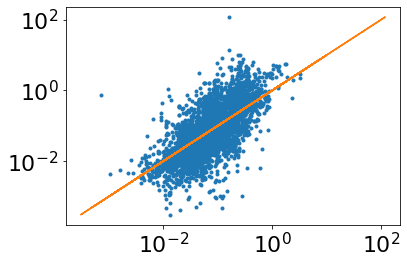

In [1814]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)

plt.xscale('log')
plt.yscale('log')

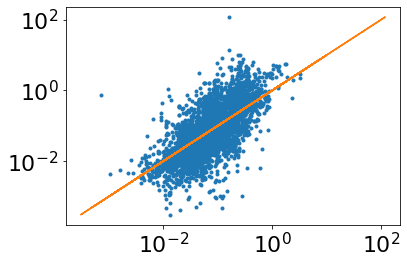

In [1773]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)

plt.xscale('log')
plt.yscale('log')

In [823]:
plt.plot(np.arange(.1,1.1,.1),r2all)
plt.ylim([.4,.5])

NameError: name 'r2all' is not defined

In [1812]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

599.9138213605429

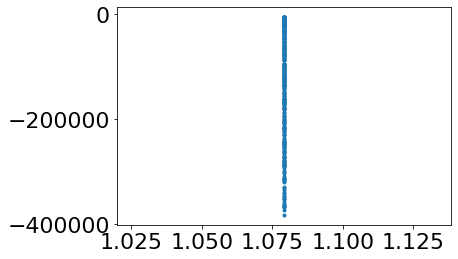

In [791]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

(array([41., 31., 33., 26., 20., 35., 21., 15., 24., 22.]),
 array([0.01062576, 1.00164145, 1.99265713, 2.98367281, 3.97468849,
        4.96570417, 5.95671985, 6.94773553, 7.93875122, 8.9297669 ,
        9.92078258]),
 <BarContainer object of 10 artists>)

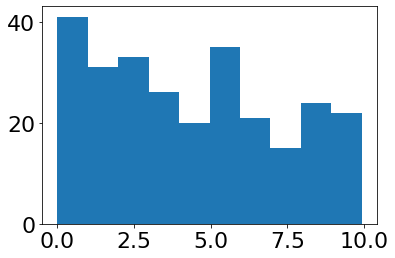

In [825]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

NameError: name 'areas' is not defined

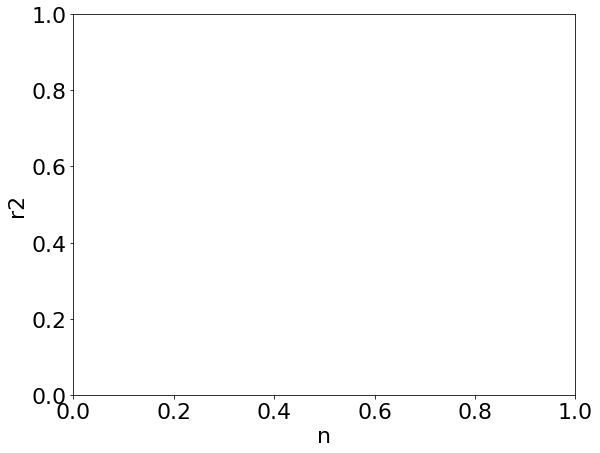

In [1077]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


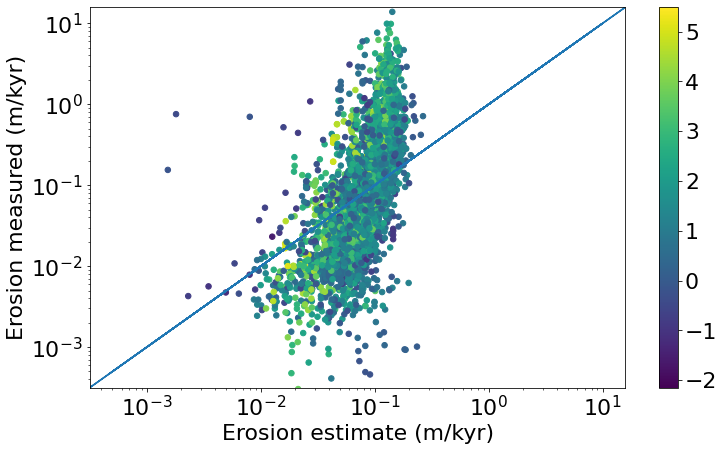

In [482]:
fig, ax = plt.subplots(figsize = (12,7))
io = 55
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=30,c=np.log10(a['area']))
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xlim([10**-3.5,10**1.2])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


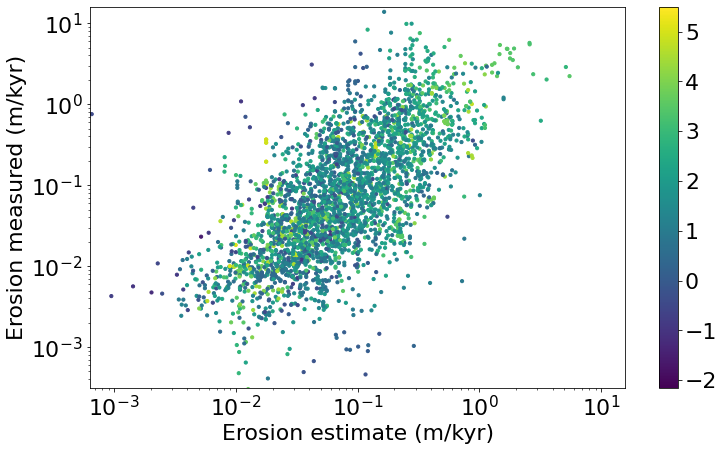

In [1815]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10,c=np.log10(a['area']))
#plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xlim([10**-3.2,10**1.2])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()


In [1803]:
ns[np.argmax(r2s)]

2.5349460165244717

(0.0, 5.0)

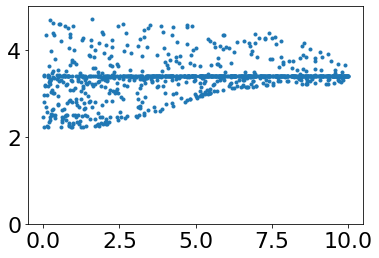

In [1586]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,5])

<ipython-input-1550-b38177b8c99e>:3: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
<ipython-input-1550-b38177b8c99e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['bio12'][loc] = 0
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-1550-b38177b8c99e>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

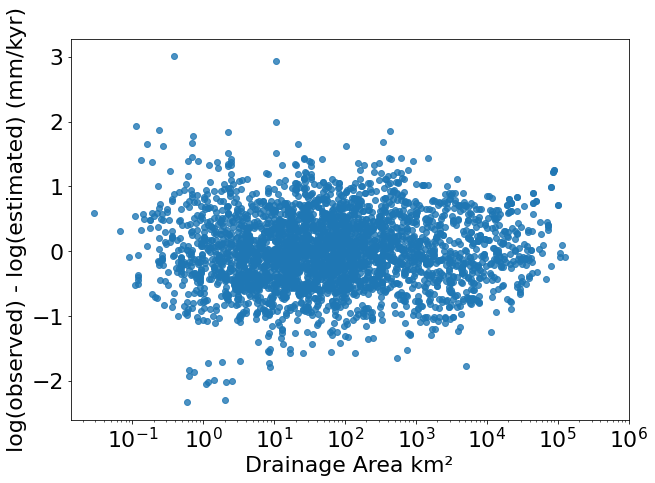

In [1550]:
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(observed) - log(estimated) (mm/kyr)')
plt.xlim([0, 10**6])

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [489]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

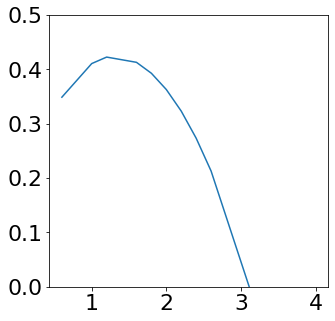

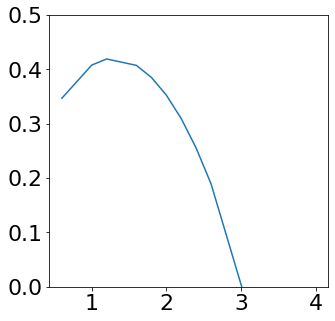

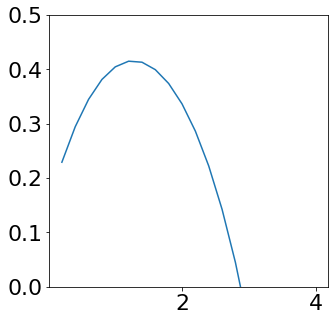

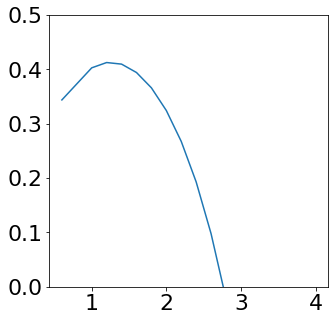

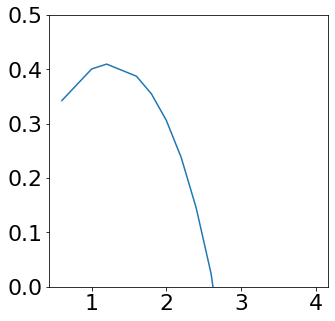

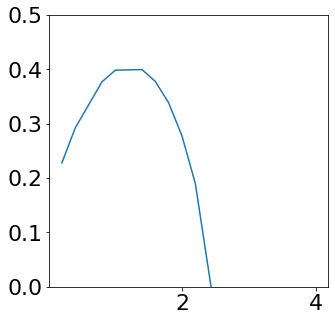

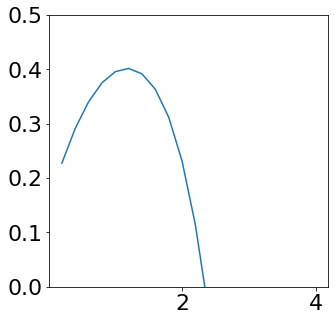

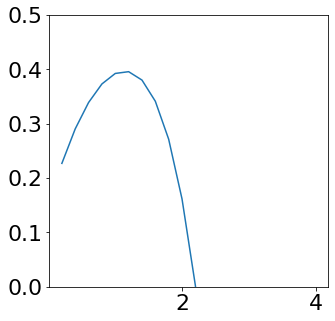

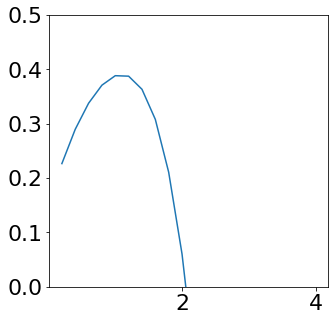

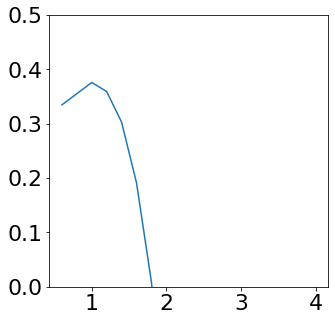

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

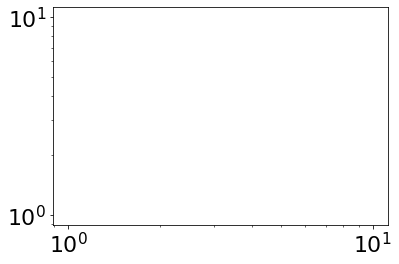

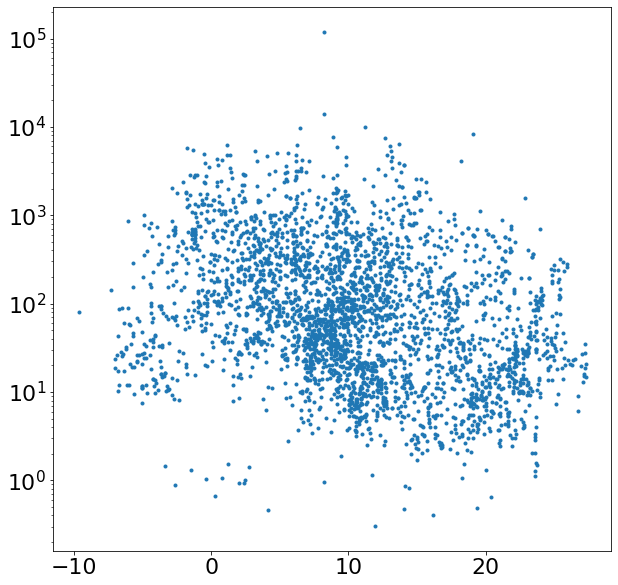

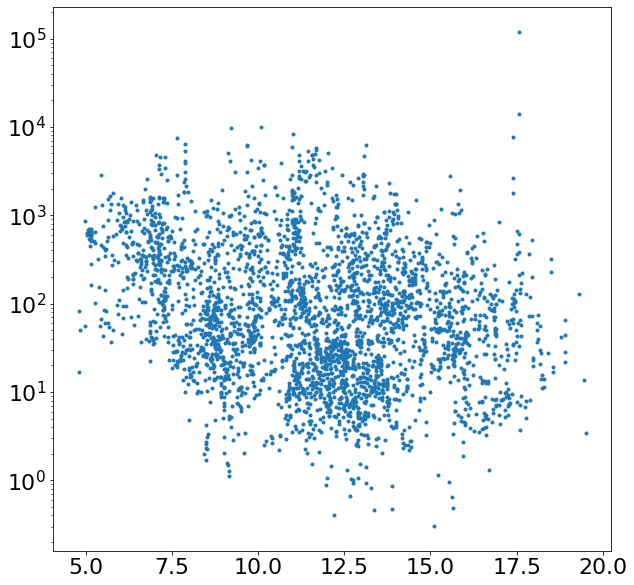

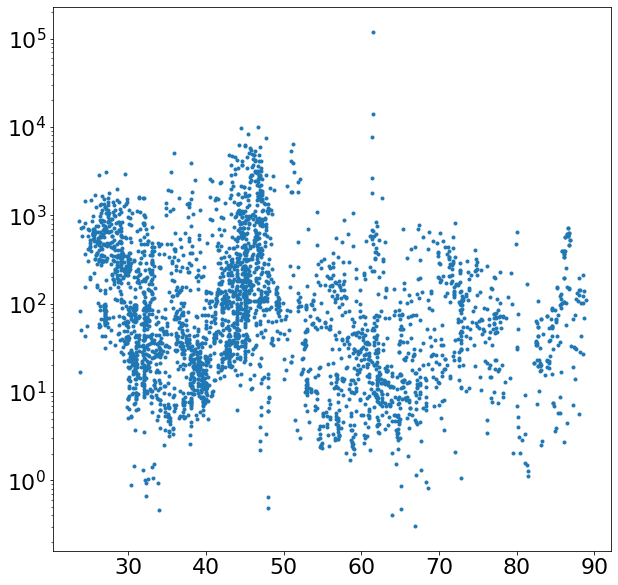

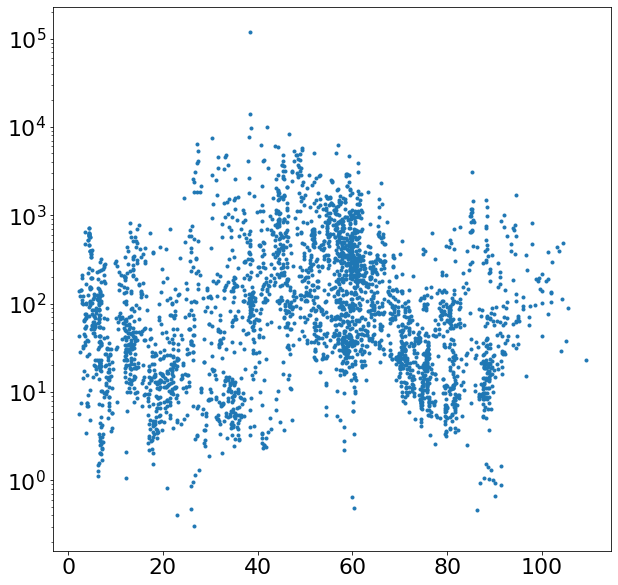

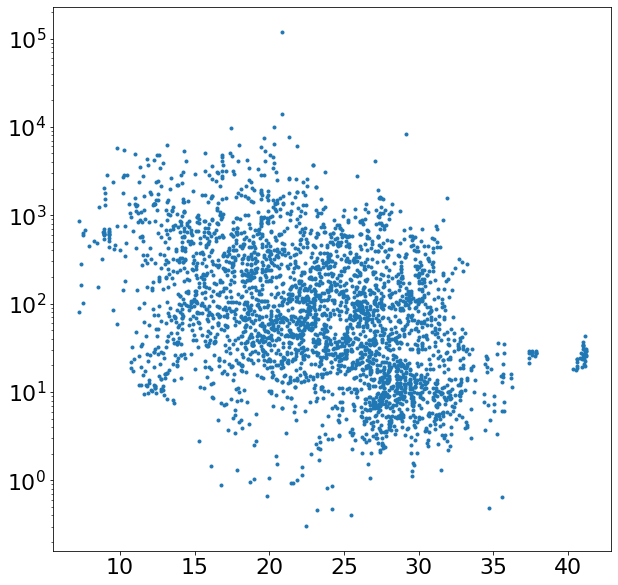

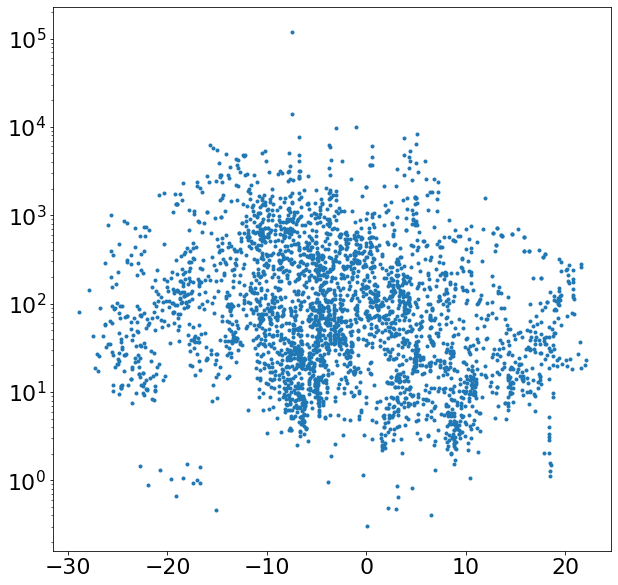

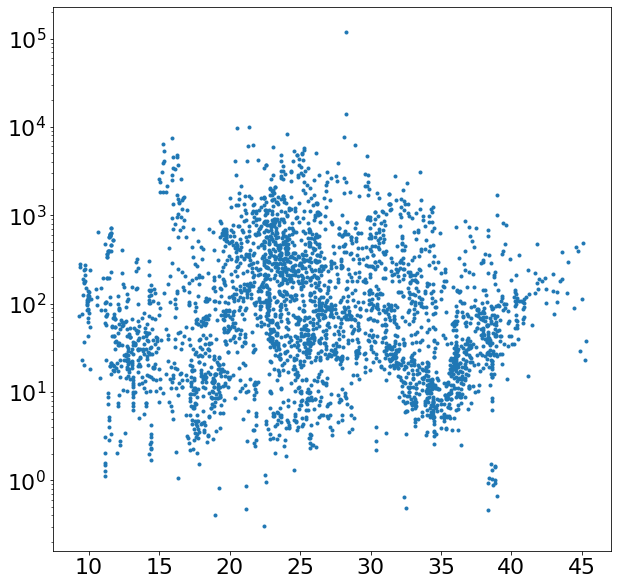

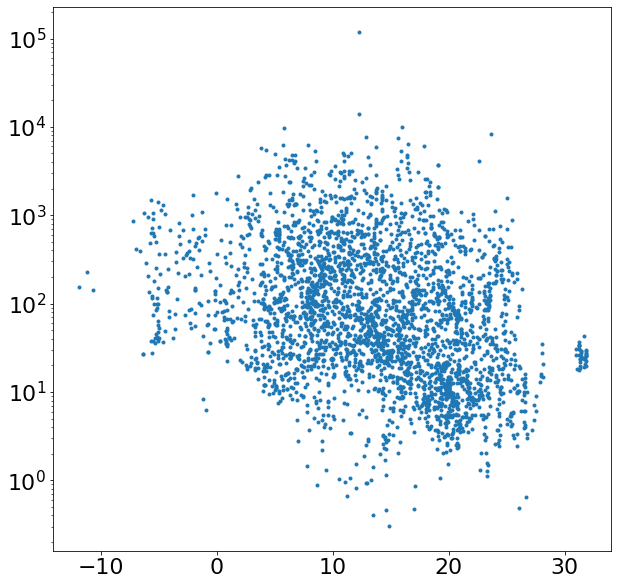

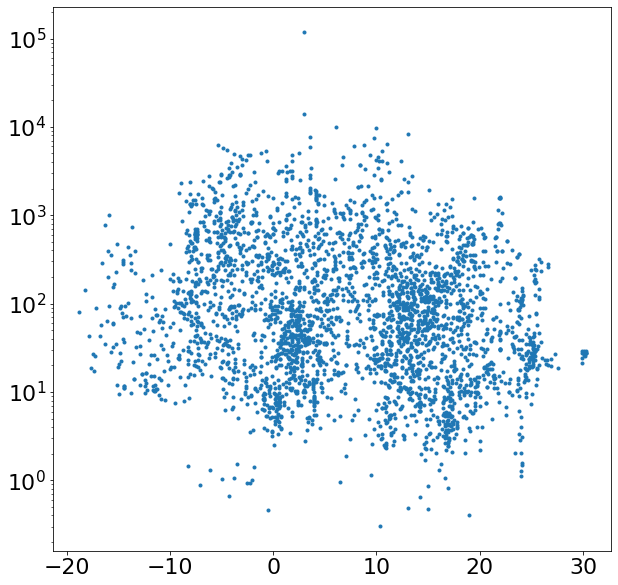

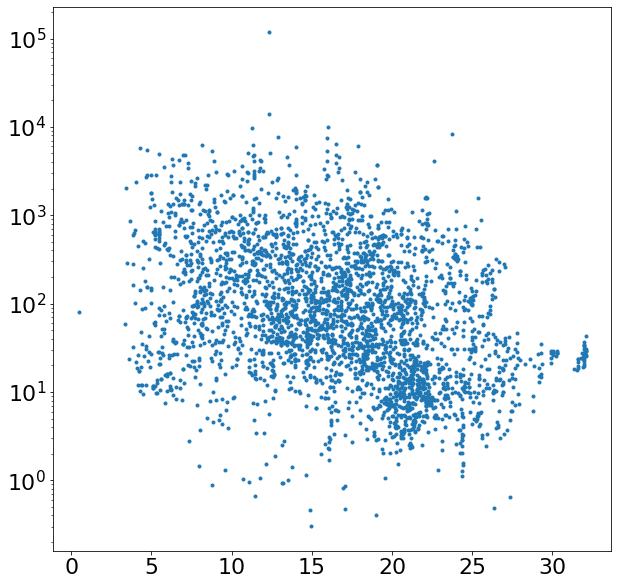

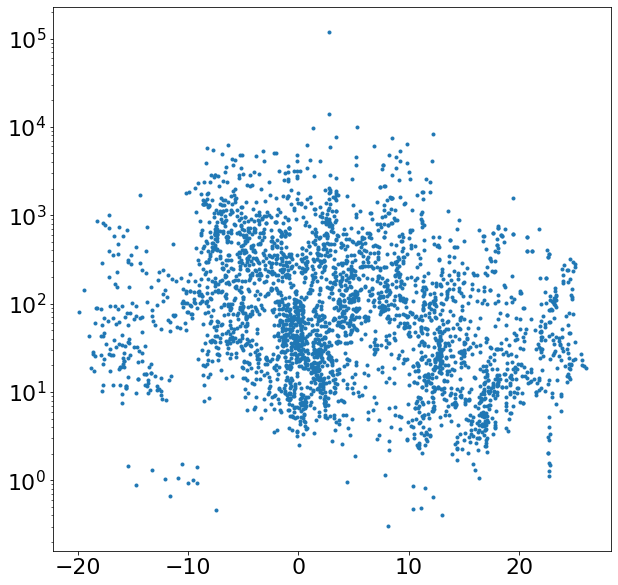

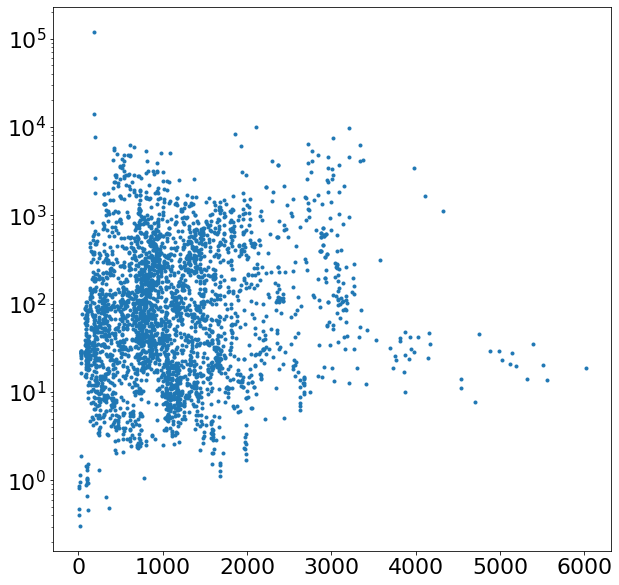

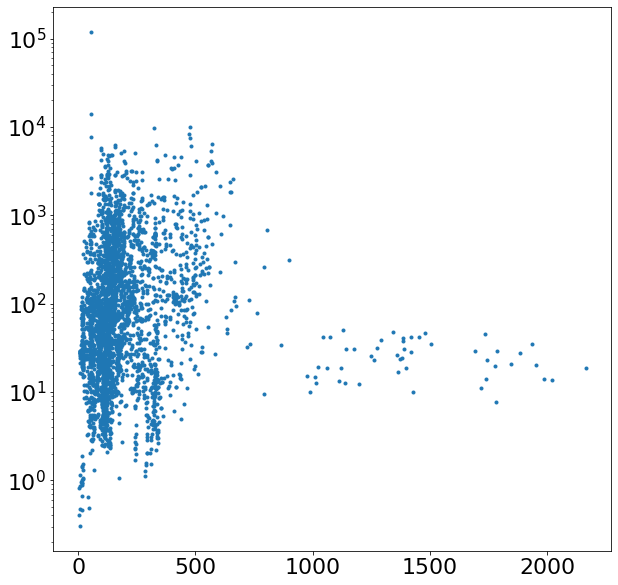

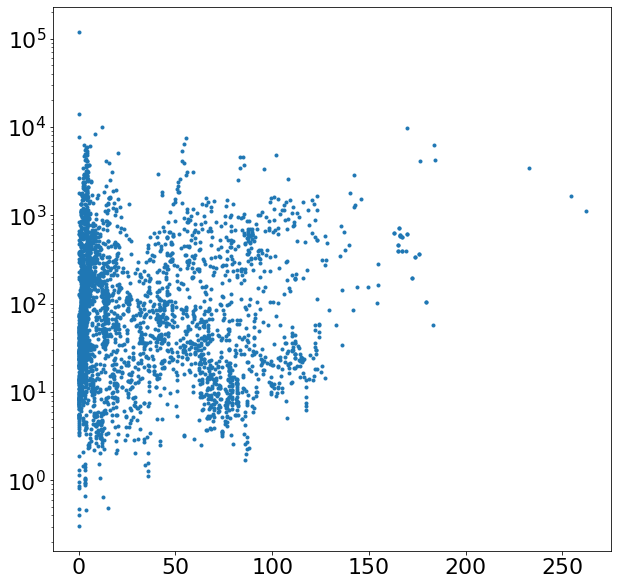

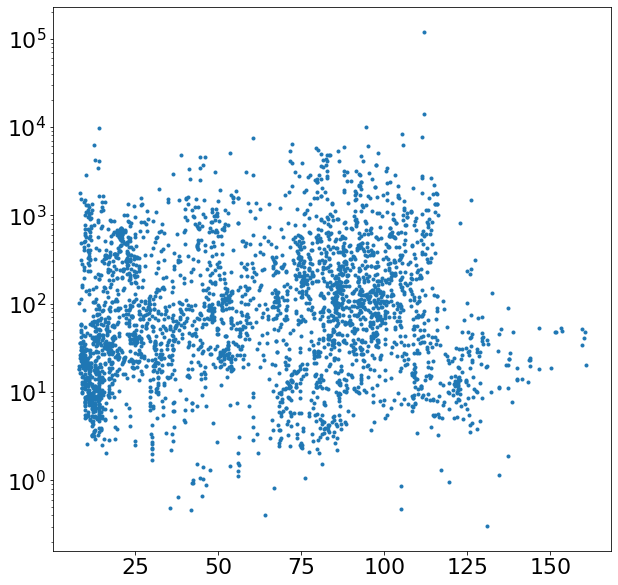

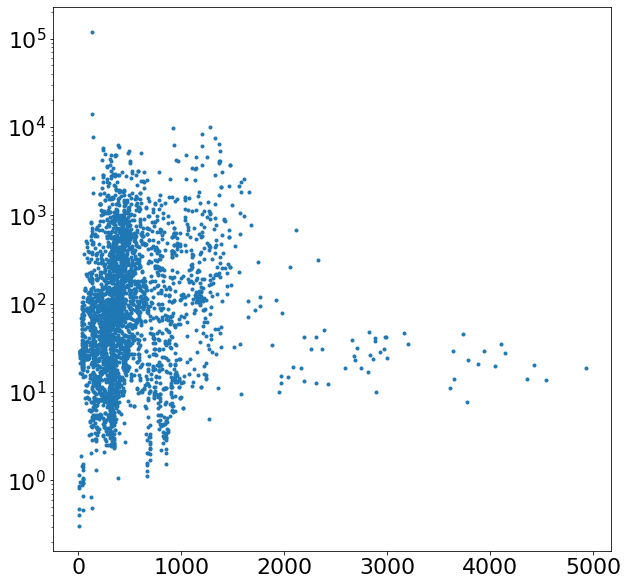

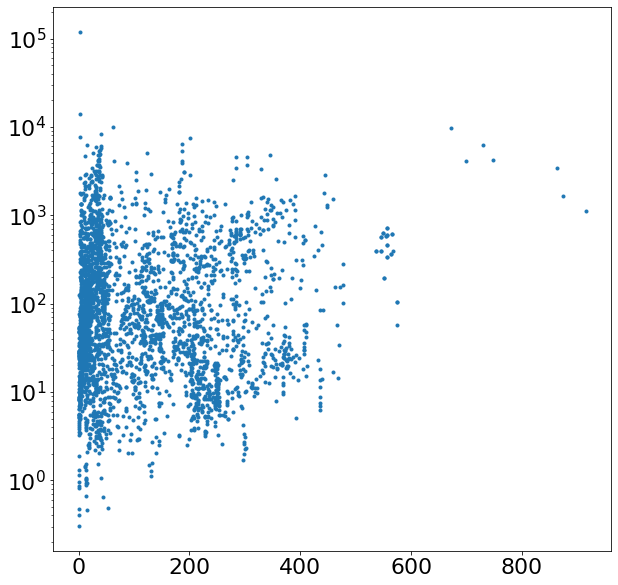

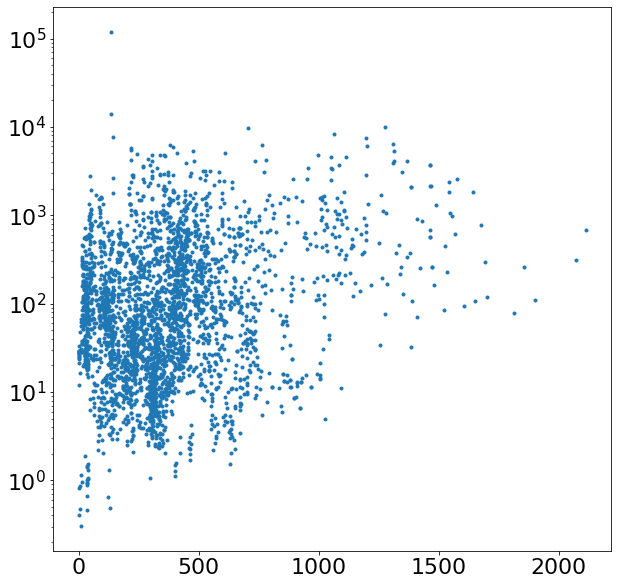

In [1835]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]
a['realid'] = a.index

for i in range(1,19):
    n = pd.read_csv('/Users/gr_1/Google Drive/data_earth_engine/basins_bio_{}.csv'.format(str(i)))
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = range(len(n))
    #a2['bio_old'+str(i)] = n['mean']
for i in range(1,19):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [1569]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])
breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.cut(a['bio15'],breaks)
a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
a['meantempclass'] = pd.qcut(a['bio13'] - a['bio14'], 10)


In [1836]:
## tectonic regimes
t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
a['meantempclass'] = -1
mt1 = np.zeros(len(a))
for i in range(len(a)):
    try:
        mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
    except:
        continue
a['meantempclass'] = np.int32(mt1)

In [1157]:
## Unique cross-validation type thing
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,100))
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    c+=1



IndexError: index 100 is out of bounds for axis 1 with size 100

In [1559]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
        

<ipython-input-1559-76b0c1aaaa60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [692]:
m,n = np.shape(groups)
lens = np.zeros(len(eros1[1]))
for j in range(n):
    for i in range(m):
        lens[j] = len(np.where(groups[:,j]>0)[0])

<AxesSubplot:xlabel='bio10', ylabel='Count'>

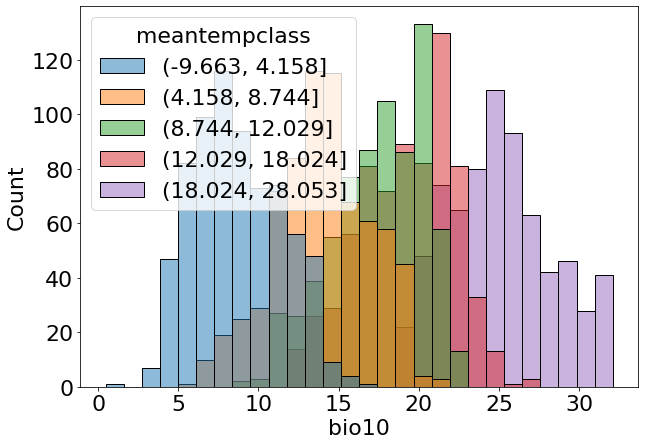

In [831]:
import seaborn as sns
plt.subplots(figsize=(10,7))
sns.histplot(data=a,x='bio10',log_scale=False,hue='meantempclass')

In [1833]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [1921]:
from sklearn import linear_model as lm
import sklearn
n = 0
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[1])*len(a['meantempclass'].unique()))
abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
mt = a['meantempclass'].unique()
c=0
for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[1]))
    resid = np.zeros(len(eros1[1]))
    pcoef = np.zeros(len(eros1[1]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    mntemp[li] = np.mean(a['bio1'][ids])

    for i in range(len(eros1[1])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
            
            y = np.log(np.float64(a['ebe_mmkyr'][ids])/1000)
            x = np.log(dfs[i][ids])
            print(len(x[x>0]))
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]

            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>50:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
                    
                    intercept =np.mean(y-x)
                    y2 = x+intercept
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                   # y2 = p.predict(x.reshape(-1,1))
                    y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    diffus2[i] *= p1.coef_
                    #ks2[i] *= p1.coef_
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    print(len(y[np.logical_not(np.isnan(x))]))
                    pcoef[i] = p1.coef_
                    
                    abox.loc[c,'r2s'] = r2s[li][i]
                    abox.loc[c,'meantempclass'] = li#
                    abox.loc[c,'class'] = mt[li]
                    abox.loc[c,'n'] = ns[i]
                    abox.loc[c,'D/k'] = diffus[i] / ks[i]
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    c=c+1
    #abox.loc[ids,''] = r2s[li]

                   # if resid[i]>127.9:
                    #    break
#a['maxr2s'] = dfs[np.argmax('elev_mn')] * pcoef[np.argmax(maxr2s)]


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


392
1559
1702
1559
1700
1559
1702
1559
1702
1559
0
1559
423
1559
1702
1559
0
1559
54
1559
1383
1559
1700
1559
1013
1559
427
1559
0
1559
1286
1559
1702
1559
0
1559
227
1559
0
1559
565
1559
0
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
1691
1559
1571
1559
0
1559
490
1559
1672
1559
0
1559
0
1559
1700
1559
1702
1559
0
1559
0
1559
1702
1559
7
1559
1675
1559
673
1559
1702
1559
50
1559
0
1559
1519
1559
1702
1559
1702
1559
1702
1559
0
1559
893
1559
527
1559
1702
1559
1702
1559
1674
1559
0
1559
1077
1559
1702
1559
42
1559
1702
1559
1675
1559
1702
1559
0
1559
1700
1559
0
1559
22
1559
1702
1559
1702
1559
1702
1559
0
1559
1611
1559
1660
1559
972
1559
1700
1559
1694
1559
0
1559
0
1559
1702
1559
1702
1559
0
1559
1702
1559
997
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1702
1559
1226
1559
0
1559
1675
1559
1295
1559
1493
1559
1180
1559
1644
1559
1123
1559
0
1559
1702
1559
1701
1559
0
1559
1702
1559
1690
1559
1651
1559
1687
1559
1702
1559
0
1559
1702
1559
1702
1559
0
1559
0
1559
1702
1559
662
1559
635
1559
1702
1559
1631
1559
0
1559
1702
1559
0
1559
0
1559
1702
1559
1698
1559
1702
1559
1623
1559
1702
1559
1702
1559
1424
1559
438
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
1702
1559
1702
1559
1204
1559
0
1559
0
1559
1673
1559
1702
1559
101
1559
1701
1559
1702
1559
1702
1559
1650
1559
1702
1559
0
1559
1702
1559
1245
1559
1353
1559
0
1559
1469
1559
0
1559
0
1559
1531
1559
1702
1559
0
1559
0
1559
970
1559
0
1559
0
1559
1072
1559
1675
1559
1701
1559
0
1559
211
1559
1702
1559
0
1559
1700
1559
0
1559
1702
1559
1455
1559
1702
1559
1702
1559
1657
1559
1702
1559
1702
1559
0
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
1559
1702
1559
1702
1559
1527
1559
0
1559
1119
1559
0
1559
1298
1559
1251
1559
0
1559
1175
1559
0
1559
1520
1559
1594
1559
0
1559
1702
1559
0
1559
1702
1559
0
1559
0
1559
1702
1559
0
1559
1701
1559
0
1559
1702
1559
583
1559
1649
1559
1702
1559
1675
1559
0
1559
0
1559
1675
1559
1702
1559
0
1559
1025
1559
1702
1559
1702
1559
0
1559
1702
1559
1630
1559
1612
1559
1489
1559
1592
1559
0
1559
1701
1559
0
1559
1702
1559
1673
1559
0
1559
0
1559
1617
1559
0
1559
1702
1559
198
1559
0
1559
1669
1559
0
1559
1246
1559
0
1559
1632
1559
1702
1559
1702
1559
1702
1559
1607
1559
1589
1559
1531
1559
0
1559
1702
1559
0
1559
284
1559
1702
1559
0
1559
0
1559
1654
1559
0
1559
1575
1559
0
1559
0
1559
1702
1559
1702
1559
464
1559
0
1559
0
1559
1702
1559
1702
1559
1700
1559
1691
1559
1612
1559
1702
1559
1491
1559
1091
1559
154
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1702
1559
1702
1559
440
1559
1702
1559
1702
1559
0
1559
1702
1559
1622
1559
0
1559
1669
1559
0
1559
0
1559
0
1559
1702
1559
1670
1559
0
1559
1663
1559
1702
1559
1626
1559
1424
1559
1702
1559
505
1559
1702
1559
1406
1559
1414
1559
1700
1559
508
1559
1702
1559
669
1559
0
1559
84
1559
1702
1559
1702
1559
1702
1559
6
1559
1598
1559
0
1559
342
1559
0
1559
1702
1559
0
1559
1702
1559
1320
1559
0
1559
1702
1559
1702
1559
1700
1559
35
1559
0
1559
1702
1559
0
1559
1702
1559
1702
1559
1697
1559
0
1559
0
1559
1702
1559
635
1559
1702
1559
0
1559
0
1559
0
1559
0
1559
0
1559
1556
1559
1702
1559
1702
1559
0
1559
0
1559
0
1559
1702
1559
114
1559
1700
1559
0
1559
0
1559
532
1559
0
1559
1702
1559
0
1559
0
1559
1702
1559
1702
1559
0
1559
1702
1559
0
1559
0


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1559
1700
1559
604
1559
0
1559
0
1559
0
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
546
1559
0
1559
0
1559
1692
1559
0
1559
1702
1559
1702
1559
1
1559
0
1559
1702
1559
1702
1559
743
1559
1240
1559
8
1559
593
1559
1390
1559
0
1559
1702
1559
163
1559
0
1559
25
1559
0
1559
0
1559
1702
1559
844
1559
1700
1559
676
1559
0
1559
0
1559
0
1559
0
1559
1702
1559
1664
1559
1702
1559
1505
1559
802
1559
1702
1559
32
1559
1702
1559
1702
1559
1408
1559
0
1559
1069
1559
1684
1559
0
1559
1702
1559
1702
1559
1702
1559
1702
1559
1304
1559
0
1559
0
1559
1702
1559
1661
1559
1702
1559
0
1559
1702
1559
310
1559
1702
1559
955
1559
1702
1559
1702
1559
788
1559
0
1559
1608
1559
0
1559
1605
1559
0
1559
1702
1559
1702
1559
1702
1559
0
1559
0
1559
1702
1559
0
1559
1551
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
1559
225
1559
0
1559
1690
1559
1267
1559
0
1559
1673
1559
15
1559
1702
1559
376
1559
0
1559
0
1559
0
1559
1532
1559
1702
1559
1702
1559
1702
1559
0
1559
14
1559
0
1559
0
1559
0
1559
1667
1559
1702
1559
0
1559
0
1559
439
1559
0
1559
0
1559
1679
1559
1702
1559
0
1559
1700
1559
1702
1559
1702
1559
1702
1559
0
1559
1702
1559
1702
1559
1404
1559
1701
1559
0
1559
1286
1559
1702
1559
1199
1559
1702
1559
0
1559
1700
1559
796
1559
1702
1559
1268
1559
1702
1559
1702
1559
1682
1559
1702
1559
1357
1559
82
1559
1094
1559
11
1559
1702
1559
1702
1559
11
1559
1700
1559
0
1559
0
1559
0
1559
0
1559
0
1559
1702
1559
1633
1559
1550
1559
1702
1559
1702
1559
1657
1559
1702
1559
1702
1559
1130
1559
0
1559
1537
1559
1702
1559
1325
1559
0
1559
0
1559
1538
1559
0
1559
1702
1559
720
1559
886
1559
1385
1559
1507
1559
1702
1559
1702
1559
247
1559
1673
1559
1702
1559
491
1559
0
1559
1702
1559
1702
1559
1702
1559
1587
1559
0
1559
0
1559
1666
1559
118
1559
1702
1559
880
1559
1677
1559
1702
1559
0
1559
1702
1559
170

<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1559
1566
1559
1637
1559
430
1559
1702
1559
56
1559
0
1559
0
1559
0
1559
0
1559
1675
1559
1702
1559
0
1559
0
1559
0
1559
1702
1559
0
1559
0
1559
1702
1559
0
1559
0
1559
1702
1559
1683
1559
270
1559
1702
1559
1613
1559
1702
1559
1701
1559
0
1559
1702
1559
1702
1559
1609
1559
0
1559
1702
1559
559
1559
1701
1559
1702
1559
1702
1559
0
1559
1702
1559
1702
1559
0
1559
0
1559
1619
1559
1702
1559
1702
1559
1110
1559
0
1559
1702
1559
1585
1559
1674
1559
1207
1559
1702
1559
1702
1559
1341
1559
1702
1559
1702
1559
1378
1559
0
1559
1702
1559
1702
1559
1672
1559
1585
1559
0
1559
1557
1559
1547
1559
14
1559
1702
1559
0
1559
1673
1559
1327
1559
1228
1559
1702
1559
1675
1559
0
1559
1424
1559
0
1559
1420
1559
1369
1559
1694
1559
0
1559
1702
1559
1702
1559
1440
1559
1256
1559
40


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1559
1691
1559
0
1559
0
1559
1700
1559
1702
1559
0
1559
0
1559
0
1559
0
1559
1700
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
6
1559
0
1559
1067
1559
1702
1559
0
1559
1702
1559
1465
1559
1702
1559
1489
1559
1702
1559
0
1559
0
1559
1702
1559
1254
1559
1702
1559
1702
1559
175
1559
1702
1559
1488
1559
0
1559
1698
1559
0
1559
1702
1559
1637
1559
0
1559
39
1559
1673
1559
1700
1559
1702
1559
239
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1080
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
759
1559
1700
1559
0
1559
0
1559
0
1559
12
1559
914
1559
0
1559
537
1559
1333
1559
0
1559
0
1559
1702
1559
1702
1559
1702
1559
0
1559
1529
1559
0
1559
0
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
1559
1700
1559
1700
1559
0
1559
1702
1559
0
1559
0
1559
1700
1559
0
1559
1702
1559
698
1559
1702
1559
1702
1559
1660
1559
1702
1559
1702
1559
0
1559
1702
1559
50
1559
1702
1559
1290
1559
0
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
1663
1559
1657
1559
0
1559
1702
1559
1040
1559
1702
1559
450
1559
0
1559
0
1559
1277
1559
0
1559
1678
1559
1702
1559
279
1559
0
1559
0
1559
0
1559
1673
1559
1702
1559
1363
1559
503
1559
0
1559
488
1559
1271
1559
1688
1559
0
1559
1702
1559
1702
1559
0
1559
1702
1559
1247
1559
1552
1559
299
1559
1702
1559
0
1559
1702
1559
1702
1559
1702
1559
272
1559
1674
1559
1577
1559
1216
1559
0
1559
43
1559
1651
1559
22
1559
1702
1559
0
1559
1702
1559
98
1559
1303
1559
615
1559
1702
1559
1701
1559
1702
1559
0
1559
1698
1559
1702
1559
1702
1559


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1702
1559
0
1559
1702
1559
1702
1559
1383
1559
462
1559
0
1559
1550
1559
0
1559
0
1559
285
1559
1486
1559
1700
1559
0
1559
1672
1559
1702
1559
0
1559
1698
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
1612
1559
1702
1559
0
1559
0
1559
1702
1559
0
1559
197
1559
5
1559
1702
1559
1625
1559
1702
1559
0
1559
603
1559
0
1559
1702
1559
0
1559
1426
1559
967
1559
0
1559
1592
1559
1702
1559
116
1559
402
1559
1702
1559
1702
1559
0
1559
0
1559
1213
1559
1702
1559
1702
1559
0
1559
0
1559
1702
1559
716
1559
1702
1559
1702
1559
1702
1559
1702
1559
1702
1559
0
1559
570
1559
1700
1559
0
1559
1702
1559
1702
1559
0
1559
0
1559
500
1559
1702
1559
1702
1559
1702
1559
1702
1559
1675
1559
0
1559
1702
1559
0
1559
1702
1559
528
1559
1702
1559
1641
1559
0
1559
147
1559
399
1559
1700


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


1559
72
1559
186
1559
1702
1559
1648
1559
0
1559
1667
1559
0
1559
1702
1559
0
1559
0
1559
0
1559
1702
1559
0
1559
482
1559
0
1559
1702
1559
1702
1559
1702
1559
1698
1559
14
1559
1702
1559
1702
1559
1702
1559
1686
1559
1701
1559
0
1559
1700
1559
1702
1559
1113
1559
1702
1559
1673
1559
1702
1559
394
1559
1702
1559
0
1559
0
1559
1700
1559
1238
1559
0
1559
0
1559
173
1559
1166
1559
1170
1559
765
1559
0
1559
1513
1559
1702
1559
1700
1559
0
1559
1702
1559
625
1559
1702
1559
117
1559
956
1559
0
1559
0
1559
0
1559
0
1559
280
770
824
770
823
770
824
770
824
770
0
770
246
770
824
770
0
770
35
770
684
770
823
770
555
770
289
770
0
770
647
770
824
770
0
770
152
770
0
770
377
770
0
770
824
770
824
770
824
770
824
770
0
770
816
770
752
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
770
300
770
807
770
0
770
0
770
823
770
824
770
0
770
0
770
824
770
1
770
816
770
372
770
824
770
34
770
0
770
743
770
824
770
824
770
824
770
0
770
444
770
318
770
824
770
824
770
810
770
0
770
518
770
824
770
75
770
824
770
815
770
824
770
0
770
822
770
0
770
67
770
824
770
824
770
824
770
0
770
770
770
796
770
530
770
824
770
817
770
0
770
0
770
824
770
824
770
0
770
824
770
489
770
824
770
612
770
0
770
816
770
650
770
716
770
631
770
786
770
540
770
0
770
824
770
823
770
0
770
824
770
816
770
800
770
813
770
824
770
0
770
824
770
824
770
0
770
0
770
824
770
398
770
368
770
824
770
786
770
0
770
824
770
0
770
0
770
824
770
820
770
824
770
780
770
824
770
824
770
697
770
292
770
824
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


824
770
824
770
824
770
0
770
824
770
824
770
629
770
0
770
0
770
810
770
824
770
95
770
823
770
824
770
824
770
798
770
824
770
0
770
824
770
624
770
665
770
0
770
729
770
0
770
0
770
746
770
824
770
0
770
0
770
477
770
0
770
0
770
516
770
814
770
823
770
0
770
151
770
824
770
0
770
821
770
0
770
824
770
713
770
823
770
824
770
801
770
824
770
824
770
0
770
0
770
823
770
824
770
756
770
0
770
576
770
0
770
651
770
624
770
1
770
599
770
0
770
739
770
765
770
0
770
824
770
0
770
824
770
0
770
0
770
824
770
0
770
823
770
0
770
824
770
325
770
798
770
824
770
816
770
0
770
0
770
814
770
824
770
0
770
531
770
824
770
824
770
0
770
824
770
782
770
772
770
736
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


765
770
0
770
823
770
0
770
824
770
809
770
0
770
0
770
776
770
0
770
824
770
124
770
0
770
805
770
0
770
621
770
0
770
785
770
824
770
824
770
824
770
775
770
765
770
749
770
0
770
824
770
0
770
178
770
824
770
0
770
0
770
796
770
0
770
752
770
0
770
0
770
824
770
824
770
279
770
0
770
0
770
824
770
824
770
821
770
820
770
777
770
824
770
736
770
527
770
95
770
823
770
823
770
284
770
824
770
824
770
0
770
824
770
779
770
0
770
804
770
0
770
0
770
0
770
824
770
805
770
0
770
806
770
824
770
780
770
705
770
824
770
298
770
824
770
690
770
692
770
822
770
313
770
824
770
372
770
0
770
50
770
824
770
824
770
824
770
8
770
769
770
0
770
225
770
0
770
824
770
0
770
824
770
665
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
770
824
770
824
770
824
770
72
770
0
770
824
770
0
770
824
770
824
770
820
770
0
770
0
770
824
770
422
770
824
770
0
770
0
770
0
770
0
770
0
770
751
770
824
770
824
770
0
770
0
770
0
770
824
770
107
770
823
770
0
770
0
770
319
770
0
770
824
770
0
770
0
770
824
770
824
770
0
770
824
770
0
770
0
770
823
770
364
770
0
770
0
770
0
770
824
770
824
770
824
770
824
770
824
770
0
770
333
770
0
770
0
770
819
770
0
770
824
770
824
770
6
770
0
770
823
770
824
770
455
770
622
770
13
770
377
770
687
770
0
770
824
770
131
770
0
770
22
770
0
770
0
770
824
770
498
770
822
770
372
770
0
770
0
770
0
770
0
770
824
770
808
770
824
770
738
770
407
770
824
770
26
770
824
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


824
770
692
770
0
770
569
770
814
770
0
770
823
770
824
770
824
770
823
770
665
770
0
770
0
770
824
770
800
770
824
770
0
770
824
770
200
770
824
770
533
770
824
770
824
770
483
770
0
770
775
770
0
770
771
770
0
770
824
770
824
770
823
770
0
770
0
770
823
770
0
770
752
770
0
770
151
770
0
770
816
770
632
770
0
770
811
770
47
770
823
770
223
770
0
770
0
770
0
770
745
770
824
770
824
770
824
770
0
770
50
770
0
770
0
770
0
770
802
770
824
770
0
770
0
770
270
770
0
770
0
770
813
770
824
770
0
770
822
770
824
770
824
770
824
770
0
770
824
770
824
770
691
770
824
770
0
770
647
770
824
770
591
770
824
770
0
770
822
770
443
770
824
770
645
770
824
770
824
770
818
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


824
770
678
770
42
770
572
770
17
770
824
770
824
770
19
770
822
770
0
770
0
770
0
770
0
770
0
770
824
770
786
770
746
770
824
770
824
770
796
770
824
770
824
770
590
770
0
770
730
770
824
770
661
770
0
770
0
770
730
770
0
770
824
770
425
770
506
770
689
770
739
770
824
770
824
770
154
770
808
770
824
770
285
770
0
770
824
770
824
770
824
770
763
770
0
770
0
770
803
770
75
770
824
770
503
770
806
770
824
770
0
770
824
770
824
770
824
770
558
770
495
770
0
770
824
770
821
770
824
770
824
770
0
770
824
770
0
770
787
770
820
770
0
770
162
770
0
770
824
770
824
770
824
770
820
770
0
770
0
770
214
770
0
770
824
770
824
770
0
770
824
770
0
770
758
770
0
770
531
770
824
770
0
770
0


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


770
0
770
395
770
808
770
348
770
823
770
823
770
824
770
824
770
824
770
824
770
1
770
0
770
0
770
98
770
757
770
790
770
290
770
824
770
84
770
0
770
0
770
0
770
0
770
814
770
824
770
0
770
0
770
0
770
824
770
0
770
0
770
824
770
0
770
0
770
824
770
814
770
195
770
824
770
777
770
824
770
823
770
0
770
823
770
824
770
765
770
0
770
824
770
332
770
823
770
824
770
824
770
0
770
824
770
824
770
0
770
0
770
779
770
824
770
824
770
535
770
0
770
824
770
764
770
814
770
641
770
824
770
824
770
661
770
824
770
824
770
698
770
0
770
824
770
824
770
808
770
753
770
0
770
747
770
748
770
33
770
824
770
0
770
810
770
669
770
650
770
824
770
814
770
0
770
697
770
0
770
708
770
672


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


770
821
770
0
770
824
770
824
770
711
770
643
770
30
770
818
770
0
770
0
770
823
770
824
770
0
770
0
770
0
770
0
770
823
770
824
770
824
770
824
770
823
770
824
770
0
770
9
770
0
770
504
770
824
770
0
770
824
770
724
770
824
770
734
770
824
770
0
770
0
770
824
770
626
770
824
770
824
770
107
770
823
770
715
770
0
770
820
770
1
770
824
770
791
770
0
770
74
770
807
770
823
770
824
770
183
770
824
770
824
770
824
770
824
770
824
770
824
770
824
770
0
770
824
770
824
770
824
770
824
770
824
770
520
770
824
770
824
770
824
770
824
770
824
770
824
770
824
770
456
770
823
770
0
770
0
770
0
770
22
770
452
770
0
770
327
770
675
770
0
770
0
770
824
770
824
770
824
770
0
770
745
770
0
770

<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log



0
770
0
770
823
770
822
770
0
770
824
770
0
770
0
770
821
770
0
770
824
770
421
770
823
770
824
770
795
770
824
770
824
770
0
770
824
770
81
770
824
770
658
770
0
770
824
770
824
770
824
770
824
770
824
770
799
770
795
770
0
770
824
770
499
770
824
770
270
770
0
770
0
770
648
770
0
770
812
770
824
770
170
770
0
770
0
770
0
770
814
770
824
770
682
770
320
770
0
770
295
770
637
770
812
770
0
770
824
770
824
770
0
770
824
770
637
770
755
770
196
770
823
770
0
770
824
770
824
770
824
770
203
770
803
770
757
770
619
770
0
770
75
770
798
770
58
770
824
770
0
770
824
770
61
770
656
770
412
770
824
770
823
770
824
770
0
770
822
770
824
770
824
770
824
770
0
770
824
770
824
770
684
770
276
770

<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log



0
770
738
770
0
770
0
770
196
770
732
770
823
770
0
770
808
770
824
770
0
770
820
770
824
770
824
770
824
770
824
770
0
770
775
770
823
770
0
770
0
770
824
770
0
770
131
770
1
770
824
770
781
770
824
770
0
770
395
770
0
770
824
770
0
770
708
770
544
770
0
770
766
770
824
770
104
770
237
770
824
770
824
770
0
770
0
770
614
770
824
770
824
770
0
770
0
770
824
770
445
770
824
770
824
770
823
770
824
770
824
770
0
770
358
770
824
770
0
770
824
770
824
770
0
770
0
770
310
770
824
770
823
770
824
770
823
770
812
770
0
770
824
770
0
770
823
770
321
770
824
770
793
770
0
770
130
770
231
770
823
770
87
770
141
770
824
770
798
770
0
770
808
770
0
770
824
770
0
770
0
770
0
770
824
770


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
770
281
770
0
770
824
770
824
770
824
770
823
770
31
770
824
770
824
770
824
770
817
770
823
770
0
770
823
770
824
770
537
770
824
770
808
770
824
770
267
770
824
770
0
770
0
770
823
770
617
770
0
770
0
770
139
770
572
770
609
770
477
770
0
770
741
770
824
770
823
770
0
770
824
770
359
770
824
770
74
770
531
770
0
770
0
770
3
770
0
770
27
271
276
271
276
271
276
271
276
271
0
271
88
271
276
271
0
271
0
271
226
271
276
271
164
271
82
271
0
271
218
271
276
271
0
271
55
271
0
271
112
271
0
271
276
271
276
271
276
271
276
271
0
271
276
271
250
271
0
271
95
271
275
271
0
271
0
271
276
271
276
271
0
271
0
271
276
271
0
271
276
271
44
271
276
271
0
271
0
271
262
271
276
271
276
271
276
271
0
271
65
271
65
271
276
271
276
271
275
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
271
101
271
276
271
12
271
276
271
276
271
276
271
0
271
276
271
0
271
8
271
276
271
276
271
276
271
0
271
268
271
273
271
165
271
276
271
276
271
0
271
0
271
276
271
276
271
0
271
276
271
85
271
276
271
168
271
0
271
276
271
218
271
239
271
188
271
271
271
124
271
0
271
276
271
276
271
0
271
276
271
276
271
273
271
276
271
276
271
0
271
276
271
276
271
0
271
0
271
276
271
136
271
38
271
276
271
270
271
0
271
276
271
0
271
0
271
276
271
276
271
276
271
267
271
276
271
276
271
240
271
82
271
276
271
276
271
276
271
276
271
0
271
276
271
276
271
186
271
0
271
0
271
275
271
276
271
21
271
276
271
276
271
276
271
272
271
276
271
0
271
276
271
175
271
228
271
0
271
257
271
0
271
0
271
262
271
276
271
0
271
0
271
75
271
0
271
0
271
97
271
276
271
276
271
0
271
53
271
276
271
0
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


276
271
0
271
276
271
249
271
276
271
276
271
273
271
276
271
276
271
0
271
0
271
276
271
276
271
262
271
0
271
190
271
0
271
218
271
186
271
0
271
194
271
0
271
260
271
253
271
0
271
276
271
0
271
276
271
0
271
0
271
276
271
0
271
276
271
0
271
276
271
81
271
272
271
276
271
276
271
0
271
0
271
276
271
276
271
0
271
138
271
276
271
276
271
0
271
276
271
268
271
259
271
260
271
253
271
0
271
276
271
0
271
276
271
275
271
0
271
0
271
269
271
0
271
276
271
49
271
0
271
275
271
0
271
184
271
0
271
270
271
276
271
276
271
276
271
269
271
263
271
260
271
0
271
276
271
0
271
67
271
276
271
0
271
0
271
272
271
0
271
250
271
0
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
271
276
271
276
271
98
271
0
271
0
271
276
271
276
271
276
271
276
271
265
271
276
271
260
271
106
271
4
271
276
271
276
271
88
271
276
271
276
271
0
271
276
271
267
271
0
271
275
271
0
271
0
271
0
271
276
271
274
271
0
271
275
271
276
271
267
271
239
271
276
271
104
271
276
271
238
271
231
271
276
271
101
271
276
271
40
271
0
271
1
271
276
271
276
271
276
271
0
271
255
271
0
271
64
271
0
271
276
271
0
271
276
271
207
271
0
271
276
271
276
271
276
271
8
271
0
271
276
271
0
271
276
271
276
271
276
271
0
271
0
271
276
271
130
271
276
271
0
271
0
271
0
271
0
271
0
271
248
271
276
271
276
271
0
271
0
271
0
271
276
271
24
271
276
271
0
271
0
271
106
271
0
271
276
271
0
271
0
271
276
271
276
271
0
271
276
271
0
271
0
271
276
271
127
271
0
271
0
271
0
271
276
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


276
271
276
271
276
271
276
271
0
271
110
271
0
271
0
271
275
271
0
271
276
271
276
271
0
271
0
271
276
271
276
271
141
271
187
271
0
271
121
271
237
271
0
271
276
271
45
271
0
271
0
271
0
271
0
271
276
271
151
271
276
271
80
271
0
271
0
271
0
271
0
271
276
271
275
271
276
271
260
271
55
271
276
271
0
271
276
271
276
271
240
271
0
271
178
271
276
271
0
271
276
271
276
271
276
271
276
271
214
271
0
271
0
271
276
271
274
271
276
271
0
271
276
271
71
271
276
271
156
271
276
271
276
271
145
271
0
271
261
271
0
271
259
271
0
271
276
271
276
271
276
271
0
271
0
271
276
271
0
271
264
271
0
271
55
271
0
271
276
271
185
271
0
271
275
271
3
271
276
271
82
271
0
271
0
271
0
271
262
271
276
271
276
271
276
271
0
271
3
271
0
271
0
271
0
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


273
271
276
271
0
271
0
271
96
271
0
271
0
271
276
271
276
271
0
271
276
271
276
271
276
271
276
271
0
271
276
271
276
271
238
271
276
271
0
271
218
271
276
271
155
271
276
271
0
271
276
271
117
271
276
271
212
271
276
271
276
271
276
271
276
271
222
271
1
271
180
271
0
271
276
271
276
271
0
271
276
271
0
271
0
271
0
271
0
271
0
271
276
271
270
271
264
271
276
271
276
271
272
271
276
271
276
271
177
271
0
271
244
271
276
271
224
271
0
271
0
271
246
271
0
271
276
271
142
271
154
271
235
271
262
271
276
271
276
271
56
271
276
271
276
271
101
271
0
271
276
271
276
271
276
271
252
271
0
271
0
271
275
271
3
271
276
271
150
271
274
271
276
271
0
271
276
271
276
271
276
271
172
271
111
271
0
271
276
271
276
271
276
271
276
271
0
271
276
271
0
271
269
271
276
271
0
271
49
271
0
271
276
271
276
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


276
271
276
271
0
271
0
271
75
271
0
271
276
271
276
271
0
271
276
271
0
271
268
271
0
271
154
271
276
271
0
271
0
271
0
271
131
271
275
271
34
271
276
271
276
271
276
271
276
271
276
271
276
271
0
271
0
271
0
271
23
271
267
271
271
271
83
271
276
271
17
271
0
271
0
271
0
271
0
271
276
271
276
271
0
271
0
271
0
271
276
271
0
271
0
271
276
271
0
271
0
271
276
271
276
271
60
271
276
271
265
271
276
271
276
271
0
271
276
271
276
271
263
271
0
271
276
271
29
271
276
271
276
271
276
271
0
271
276
271
276
271
0
271
0
271
266
271
276
271
276
271
112
271
0
271
276
271
269
271
276
271
196
271
276
271
276
271
227
271
276
271
276
271
232
271
0
271
276
271
276
271
275
271
251
271
0
271
248
271
263
271
2


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


271
276
271
0
271
276
271
208
271
197
271
276
271
276
271
0
271
240
271
0
271
239
271
232
271
276
271
0
271
276
271
276
271
232
271
211
271
0
271
276
271
0
271
0
271
276
271
276
271
0
271
0
271
0
271
0
271
276
271
276
271
276
271
276
271
276
271
276
271
0
271
0
271
0
271
95
271
276
271
0
271
276
271
254
271
276
271
259
271
276
271
0
271
0
271
276
271
179
271
276
271
276
271
4
271
276
271
238
271
0
271
276
271
0
271
276
271
271
271
0
271
8
271
274
271
276
271
276
271
47
271
276
271
276
271
276
271
276
271
276
271
276
271
276
271
0
271
276
271
276
271
276
271
276
271
276
271
102
271
276
271
276
271
276
271
276
271
276
271
276
271
276
271
144
271
276
271
0
271
0
271
0
271
1
271
69
271
0
271
27
271
213
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
271
0
271
276
271
276
271
276
271
0
271
262
271
0
271
0
271
0
271
276
271
276
271
0
271
276
271
0
271
0
271
276
271
0
271
276
271
142
271
276
271
276
271
272
271
276
271
276
271
0
271
276
271
15
271
276
271
214
271
0
271
276
271
276
271
276
271
276
271
276
271
274
271
273
271
0
271
276
271
90
271
276
271
90
271
0
271
0
271
213
271
0
271
276
271
276
271
9
271
0
271
0
271
0
271
276
271
276
271
229
271
96
271
0
271
98
271
189
271
276
271
0
271
276
271
276
271
0
271
276
271
211
271
262
271
69
271
276
271
0
271
276
271
276
271
276
271
39
271
273
271
250
271
210
271
0
271
12
271
272
271
8
271
276
271
0
271
276
271
1
271
202
271
126
271
276
271
276
271
276
271
0
271
276
271
276
271
276
271
276
271
0
271
276
271
276
271
227
271
98
271
0
271
246
271
0
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
271
65
271
259
271
276
271
0
271
275
271
276
271
0
271
276
271
276
271
276
271
276
271
276
271
0
271
269
271
276
271
0
271
0
271
276
271
0
271
49
271
0
271
276
271
271
271
276
271
0
271
111
271
0
271
276
271
0
271
232
271
159
271
0
271
269
271
276
271
27
271
79
271
276
271
276
271
0
271
0
271
211
271
276
271
276
271
0
271
0
271
276
271
140
271
276
271
276
271
276
271
276
271
276
271
0
271
119
271
276
271
0
271
276
271
276
271
0
271
0
271
99
271
276
271
276
271
276
271
276
271
276
271
0
271
276
271
0
271
276
271
26
271
276
271
271
271
0
271
40
271
83
271
276
271
17
271
41
271
276
271
271
271
0
271
275
271
0
271
276
271
0
271
0
271
0
271
276
271
0
271
20
271
0
271
276
271
276
271
276
271
276
271
2
271
276
271
276
271
276
271


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


276
271
276
271
0
271
276
271
276
271
120
271
276
271
275
271
276
271
73
271
276
271
0
271
0
271
276
271
172
271
0
271
0
271
47
271
144
271
180
271
143
271
0
271
262
271
276
271
276
271
0
271
276
271
38
271
276
271
1
271
156
271
0
271
0
271
0
271
0
271
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
24
156
173
156
172
156
173
156
173
156
0
156
15
156
173
156
0
156
7
156
118
156
172
156
70
156
16
156
0
156
102
156
173
156
0
156
3
156
0
156
28
156
0
156
173
156
173
156
173
156
173
156
0
156
170
156
163
156
0
156
19
156
169
156
0
156
0
156
172
156
173
156
0
156
0
156
173
156
3
156
171
156
47
156
173
156
7
156
0
156
141
156
173
156
173
156
173
156
0
156
57
156
37
156
173
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


173
156
170
156
0
156
71
156
173
156
0
156
173
156
171
156
173
156
0
156
171
156
0
156
0
156
173
156
173
156
173
156
0
156
169
156
169
156
65
156
172
156
169
156
0
156
0
156
173
156
173
156
0
156
173
156
63
156
173
156
98
156
0
156
171
156
103
156
161
156
93
156
167
156
77
156
0
156
173
156
172
156
0
156
173
156
169
156
168
156
170
156
173
156
0
156
173
156
173
156
0
156
0
156
173
156
27
156
45
156
173
156
164
156
0
156
173
156
0
156
0
156
173
156
170
156
173
156
166
156
173
156
173
156
124
156
17
156
173
156
173
156
172
156
173
156
0
156
173
156
173
156
92
156
0
156
0
156
170
156
173
156
1
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


172
156
173
156
173
156
168
156
172
156
0
156
173
156
101
156
111
156
0
156
130
156
0
156
0
156
143
156
173
156
0
156
0
156
60
156
0
156
0
156
71
156
171
156
172
156
0
156
3
156
173
156
0
156
170
156
0
156
173
156
129
156
173
156
173
156
168
156
173
156
173
156
0
156
0
156
172
156
173
156
166
156
0
156
81
156
0
156
104
156
97
156
0
156
91
156
0
156
138
156
163
156
0
156
173
156
0
156
173
156
0
156
0
156
173
156
0
156
172
156
0
156
173
156
36
156
168
156
173
156
171
156
0
156
0
156
171
156
173
156
0
156
71
156
173
156
173
156
0
156
173
156
166
156
163
156
134
156
163
156
0
156
172
156
0
156
173
156
170
156
0
156
0
156
161
156
0
156
173
156
3
156
0
156
170
156
0
156
97
156
0
156
168
156
173
156
173
156
173
156
156
156
169
156
145
156
0
156
173
156
0
156
4
156
173
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
156
0
156
168
156
0
156
163
156
0
156
0
156
173
156
173
156
17
156
0
156
0
156
173
156
173
156
170
156
171
156
163
156
173
156
134
156
74
156
16
156
173
156
172
156
16
156
173
156
173
156
0
156
173
156
166
156
0
156
169
156
0
156
0
156
0
156
173
156
169
156
0
156
168
156
173
156
166
156
121
156
173
156
19
156
173
156
118
156
120
156
172
156
19
156
173
156
47
156
0
156
13
156
173
156
173
156
173
156
0
156
163
156
0
156
15
156
0
156
173
156
0
156
173
156
138
156
0
156
173
156
173
156
172
156
0
156
0
156
173
156
0
156
173
156
173
156
170
156
0
156
0
156
173
156
35
156
173
156
0
156
0
156
0
156
0
156
0
156
163
156
173
156
173
156
0
156
0
156
0
156
173
156
2
156
172
156
0
156
0
156
20
156
0
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


173
156
0
156
0
156
173
156
173
156
0
156
173
156
0
156
0
156
172
156
23
156
0
156
0
156
0
156
173
156
173
156
173
156
173
156
173
156
0
156
19
156
0
156
0
156
170
156
0
156
173
156
173
156
0
156
0
156
173
156
173
156
38
156
96
156
0
156
23
156
116
156
0
156
173
156
2
156
0
156
3
156
0
156
0
156
173
156
51
156
171
156
46
156
0
156
0
156
0
156
0
156
173
156
169
156
173
156
138
156
53
156
173
156
3
156
173
156
173
156
122
156
0
156
76
156
170
156
0
156
172
156
173
156
173
156
172
156
109
156
0
156
0
156
173
156
165
156
173
156
0
156
173
156
6
156
173
156
69
156
173
156
173
156
46
156
0
156
163
156
0
156
163
156
0
156
173
156
173
156
172
156
0
156
0
156
172
156
0
156
148
156
0
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


3
156
0
156
169
156
114
156
0
156
169
156
0
156
172
156
12
156
0
156
0
156
0
156
143
156
172
156
173
156
173
156
0
156
0
156
0
156
0
156
0
156
169
156
173
156
0
156
0
156
16
156
0
156
0
156
170
156
173
156
0
156
172
156
173
156
173
156
173
156
0
156
173
156
173
156
117
156
172
156
0
156
102
156
173
156
87
156
173
156
0
156
172
156
52
156
173
156
104
156
173
156
173
156
171
156
173
156
142
156
13
156
78
156
0
156
173
156
173
156
0
156
172
156
0
156
0
156
0
156
0
156
0
156
173
156
166
156
147
156
173
156
173
156
164
156
173
156
173
156
85
156
0
156
163
156
173
156
108
156
0
156
0
156
163
156
0
156
173
156
35
156
53
156
114
156
139
156
173
156
173
156
3
156
170
156
173
156
19
156
0
156
173
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


173
156
173
156
163
156
0
156
0
156
165
156
14
156
173
156
56
156
169
156
173
156
0
156
173
156
173
156
173
156
71
156
64
156
0
156
173
156
170
156
173
156
173
156
0
156
173
156
0
156
167
156
170
156
0
156
3
156
0
156
173
156
173
156
173
156
170
156
0
156
0
156
11
156
0
156
173
156
173
156
0
156
173
156
0
156
152
156
0
156
60
156
173
156
0
156
0
156
0
156
26
156
169
156
44
156
171
156
173
156
173
156
173
156
173
156
173
156
0
156
0
156
0
156
1
156
150
156
166
156
17
156
173
156
0
156
0
156
0
156
0
156
0
156
170
156
173
156
0
156
0
156
0
156
173
156
0
156
0
156
173
156
0
156
0
156
173
156
169
156
8
156
173
156
163
156
173
156
172
156
0
156
172
156
173
156
167
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
156
173
156
39
156
172
156
173
156
173
156
0
156
173
156
173
156
0
156
0
156
165
156
173
156
173
156
75
156
0
156
173
156
152
156
170
156
100
156
173
156
173
156
109
156
173
156
173
156
120
156
0
156
173
156
173
156
170
156
163
156
0
156
163
156
142
156
0
156
173
156
0
156
170
156
140
156
100
156
173
156
171
156
0
156
125
156
0
156
125
156
113
156
170
156
0
156
173
156
173
156
152
156
102
156
5
156
171
156
0
156
0
156
172
156
173
156
0
156
0
156
0
156
0
156
172
156
173
156
173
156
173
156
172
156
173
156
0
156
0
156
0
156
67
156
173
156
0
156
173
156
130
156
173
156
134
156
173
156
0
156
0
156
173
156
107
156
173
156
173
156
16
156
172
156
160
156
0
156
170
156
0
156
173
156
166
156
0
156
0
156
168
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


172
156
173
156
4
156
173
156
173
156
173
156
173
156
173
156
173
156
173
156
0
156
173
156
173
156
173
156
173
156
173
156
72
156
173
156
173
156
173
156
173
156
173
156
173
156
173
156
40
156
172
156
0
156
0
156
0
156
0
156
60
156
0
156
39
156
141
156
0
156
0
156
173
156
173
156
173
156
0
156
141
156
0
156
0
156
0
156
172
156
172
156
0
156
173
156
0
156
0
156
171
156
0
156
173
156
30
156
172
156
173
156
169
156
173
156
173
156
0
156
173
156
0
156
173
156
107
156
0
156
173
156
173
156
173
156
173
156
173
156
169
156
165
156
0
156
173
156
65
156
173
156
17
156
0
156
0
156
105
156
0
156
169
156
173
156
25
156
0
156
0
156
0
156
171
156
173
156
116
156
20
156
0
156
19
156
100
156
170
156
0
156
173
156
173
156
0
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


173
156
100
156
164
156
5
156
172
156
0
156
173
156
173
156
173
156
7
156
169
156
163
156
96
156
0
156
0
156
168
156
0
156
173
156
0
156
173
156
13
156
128
156
30
156
173
156
172
156
173
156
0
156
171
156
173
156
173
156
173
156
0
156
173
156
173
156
144
156
17
156
0
156
163
156
0
156
0
156
4
156
135
156
171
156
0
156
170
156
173
156
0
156
170
156
173
156
172
156
173
156
173
156
0
156
159
156
173
156
0
156
0
156
173
156
0
156
3
156
3
156
173
156
169
156
173
156
0
156
40
156
0
156
173
156
0
156
151
156
64
156
0
156
156
156
173
156
1
156
12
156
173
156
173
156
0
156
0
156
97
156
173
156
173
156
0
156
0
156
173
156
36
156
173
156
173
156
173
156
173
156
173
156
0
156
21
156
171
156
0
156
173
156
173
156
0
156
0
156
19
156
173
156
172
156
173
156


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


172
156
170
156
0
156
173
156
0
156
172
156
39
156
173
156
165
156
0
156
2
156
15
156
172
156
0
156
2
156
173
156
168
156
0
156
169
156
0
156
173
156
0
156
0
156
0
156
173
156
0
156
36
156
0
156
173
156
173
156
173
156
171
156
0
156
173
156
173
156
173
156
170
156
172
156
0
156
172
156
173
156
76
156
173
156
170
156
173
156
14
156
173
156
0
156
0
156
171
156
99
156
0
156
0
156
2
156
85
156
90
156
44
156
0
156
140
156
173
156
172
156
0
156
173
156
45
156
173
156
14
156
71
156
0
156
0
156
0
156
0
156
59
357
367
357
367
357
367
357
367
357
0
357
98
357
367
357
0
357
13
357
311
357
367
357
240
357
108
357
0
357
288
357
367
357
0
357
62
357
0
357
152
357
0
357
367
357
367
357
367
357
367
357
0
357
361
357
352
357
0
357
116
357
362
357
0
357
0
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
367
357
0
357
0
357
367
357
0
357
367
357
100
357
367
357
10
357
0
357
338
357
367
357
367
357
367
357
0
357
150
357
100
357
367
357
367
357
363
357
0
357
216
357
367
357
6
357
367
357
367
357
367
357
0
357
367
357
0
357
3
357
367
357
367
357
367
357
0
357
354
357
357
357
232
357
367
357
365
357
0
357
0
357
367
357
367
357
0
357
367
357
197
357
367
357
268
357
0
357
367
357
294
357
342
357
277
357
358
357
237
357
0
357
367
357
367
357
0
357
367
357
365
357
360
357
361
357
367
357
0
357
367
357
367
357
0
357
0
357
367
357
173
357
97
357
367
357
347
357
0
357
367
357
0
357
0
357
367
357
367
357
367
357
358
357
367
357
367
357
319
357
109
357
367
357
367
357
367
357
367
357
0
357
367
357
367
357
275
357
0
357
0
357
359
357
367
357
14
357
367
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
367
357
359
357
367
357
0
357
367
357
278
357
301
357
0
357
331
357
0
357
0
357
340
357
367
357
0
357
0
357
186
357
0
357
0
357
215
357
367
357
367
357
0
357
61
357
367
357
0
357
367
357
0
357
367
357
327
357
367
357
367
357
360
357
367
357
367
357
0
357
0
357
367
357
367
357
347
357
0
357
260
357
0
357
295
357
280
357
0
357
266
357
0
357
341
357
354
357
0
357
367
357
0
357
367
357
0
357
0
357
367
357
0
357
367
357
0
357
367
357
109
357
359
357
367
357
367
357
0
357
0
357
367
357
367
357
0
357
213
357
367
357
367
357
0
357
367
357
358
357
358
357
335
357
353
357
0
357
367
357
0
357
367
357
362
357
0
357
0
357
347
357
0
357
367
357
50
357
0
357
359
357
0
357
283
357
0
357
352
357
367
357
367
357
367
357
347
357
355
357
342
357
0
357
367
357
0
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


74
357
367
357
0
357
0
357
352
357
0
357
352
357
0
357
0
357
367
357
367
357
111
357
0
357
0
357
367
357
367
357
367
357
367
357
357
357
367
357
337
357
219
357
34
357
367
357
367
357
109
357
367
357
367
357
0
357
367
357
358
357
0
357
361
357
0
357
0
357
0
357
367
357
359
357
0
357
360
357
367
357
358
357
324
357
367
357
121
357
367
357
318
357
321
357
367
357
123
357
367
357
98
357
0
357
25
357
367
357
367
357
367
357
0
357
356
357
0
357
81
357
0
357
367
357
0
357
367
357
310
357
0
357
367
357
367
357
367
357
5
357
0
357
367
357
0
357
367
357
367
357
366
357
0
357
0
357
367
357
164
357
367
357
0
357
0
357
0
357
0
357
0
357
350
357
367
357
367
357
0
357
0
357
0
357
367
357
22
357
367
357
0
357
0
357
130
357
0
357
367
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
357
0
357
367
357
367
357
0
357
367
357
0
357
0
357
367
357
162
357
0
357
0
357
0
357
367
357
367
357
367
357
367
357
367
357
0
357
132
357
0
357
0
357
361
357
0
357
367
357
367
357
1
357
0
357
367
357
367
357
189
357
287
357
0
357
149
357
318
357
0
357
367
357
49
357
0
357
6
357
0
357
0
357
367
357
208
357
367
357
130
357
0
357
0
357
0
357
0
357
367
357
361
357
367
357
341
357
126
357
367
357
8
357
367
357
367
357
318
357
0
357
249
357
361
357
0
357
367
357
367
357
367
357
367
357
296
357
0
357
0
357
367
357
358
357
367
357
0
357
367
357
76
357
367
357
232
357
367
357
367
357
202
357
0
357
357
357
0
357
356
357
0
357
367
357
367
357
367
357
0
357
0
357
367
357
0
357
342
357
0
357
61
357
0
357
365
357
296
357
0
357
361
357
0
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
88
357
0
357
0
357
0
357
340
357
367
357
367
357
367
357
0
357
1
357
0
357
0
357
0
357
359
357
367
357
0
357
0
357
103
357
0
357
0
357
363
357
367
357
0
357
367
357
367
357
367
357
367
357
0
357
367
357
367
357
317
357
367
357
0
357
288
357
367
357
261
357
367
357
0
357
367
357
174
357
367
357
291
357
367
357
367
357
367
357
367
357
323
357
23
357
251
357
0
357
367
357
367
357
0
357
367
357
0
357
0
357
0
357
0
357
0
357
367
357
358
357
344
357
367
357
367
357
349
357
367
357
367
357
257
357
0
357
348
357
367
357
297
357
0
357
0
357
349
357
0
357
367
357
182
357
214
357
316
357
336
357
367
357
367
357
60
357
362
357
367
357
119
357
0
357
367
357
367
357
367
357
353
357
0
357
0
357
360
357
32
357
367
357
213
357
360
357
367
357
0
357
367
357
367
357
367
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


238
357
203
357
0
357
367
357
367
357
367
357
367
357
0
357
367
357
0
357
358
357
366
357
0
357
65
357
0
357
367
357
367
357
367
357
366
357
0
357
0
357
87
357
0
357
367
357
367
357
0
357
367
357
0
357
343
357
0
357
230
357
367
357
0
357
0
357
0
357
172
357
361
357
93
357
367
357
367
357
367
357
367
357
367
357
367
357
0
357
0
357
0
357
17
357
343
357
359
357
108
357
367
357
6
357
0
357
0
357
0
357
0
357
363
357
367
357
0
357
0
357
0
357
367
357
0
357
0
357
367
357
0
357
0
357
367
357
363
357
72
357
367
357
357
357
367
357
367
357
0
357
367
357
367
357
354
357
0
357
367
357
82
357
367
357
367
357
367
357
0
357
367
357
367
357
0
357
0
357
358
357
367
357
367
357
229
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


0
357
367
357
346
357
366
357
288
357
367
357
367
357
299
357
367
357
367
357
318
357
0
357
367
357
367
357
362
357
353
357
0
357
350
357
341
357
1
357
367
357
0
357
363
357
313
357
291
357
367
357
367
357
0
357
319
357
0
357
326
357
307
357
365
357
0
357
367
357
367
357
339
357
285
357
9
357
365
357
0
357
0
357
367
357
367
357
0
357
0
357
0
357
0
357
367
357
367
357
367
357
367
357
367
357
367
357
0
357
0
357
0
357
212
357
367
357
0
357
367
357
330
357
367
357
334
357
367
357
0
357
0
357
367
357
282
357
367
357
367
357
37
357
367
357
342
357
0
357
367
357
0
357
367
357
359
357
0
357
5
357
360
357
367
357
367
357
66
357
367
357
367
357
367
357
367
357
367
357
367
357
367
357
0
357
367
357
367
357
367
357
367
357
367
357
216
357
367
357
367
357
367
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
367
357
367
357
367
357
191
357
367
357
0
357
0
357
0
357
0
357
167
357
0
357
79
357
316
357
0
357
0
357
367
357
367
357
367
357
0
357
338
357
0
357
0
357
0
357
367
357
367
357
0
357
367
357
0
357
0
357
367
357
0
357
367
357
181
357
367
357
367
357
358
357
367
357
367
357
0
357
367
357
6
357
367
357
295
357
0
357
367
357
367
357
367
357
367
357
367
357
360
357
352
357
0
357
367
357
207
357
367
357
107
357
0
357
0
357
291
357
0
357
361
357
367
357
46
357
0
357
0
357
0
357
364
357
367
357
314
357
116
357
0
357
115
357
288
357
361
357
0
357
367
357
367
357
0
357
367
357
282
357
345
357
76
357
367
357
0
357
367
357
367
357
367
357
70
357
359
357
352
357
274
357
0
357
6
357
359
357
2
357
367
357
0
357
367
357
29
357
306
357
159
357
367
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
367
357
0
357
367
357
367
357
367
357
367
357
0
357
367
357
367
357
328
357
109
357
0
357
349
357
0
357
0
357
74
357
333
357
367
357
0
357
362
357
367
357
0
357
367
357
367
357
367
357
367
357
367
357
0
357
347
357
367
357
0
357
0
357
367
357
0
357
51
357
0
357
367
357
353
357
367
357
0
357
154
357
0
357
367
357
0
357
338
357
233
357
0
357
346
357
367
357
18
357
94
357
367
357
367
357
0
357
0
357
272
357
367
357
367
357
0
357
0
357
367
357
187
357
367
357
367
357
367
357
367
357
367
357
0
357
150
357
367
357
0
357
367
357
367
357
0
357
0
357
122
357
367
357
367
357
367
357
367
357
363
357
0
357
367
357
0
357
367
357
73
357
367
357
351
357
0
357
39
357
96
357
367
357
9
357
49
357
367
357
359
357
0
357
361
357
0
357
367
357
0
357
0
357
0
357


<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log


367
357
0
357
66
357
0
357
367
357
367
357
367
357
367
357
0
357
367
357
367
357
367
357
361
357
367
357
0
357
367
357
367
357
234
357
367
357
362
357
367
357
94
357
367
357
0
357
0
357
367
357
275
357
0
357
0
357
54
357
248
357
268
357
198
357
0
357
337
357
367
357
367
357
0
357
367
357
94
357
367
357
32
357
236
357
0
357
0
357
0
357
0
357
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-1921-1ef3ce071fcb>:31: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
42
42
42
42
0
6
42
0
0
32
42
16
6
0
31
42
0
2
0
7
0
42


<ipython-input-1993-f49257a7c1e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abox['classnm'][r == 146] = classes[0]
<ipython-input-1993-f49257a7c1e8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3['Rock type'] = g3['classnm']
<ipython-input-1993-f49257a7c1e8>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3[

(0.0, 1.2)

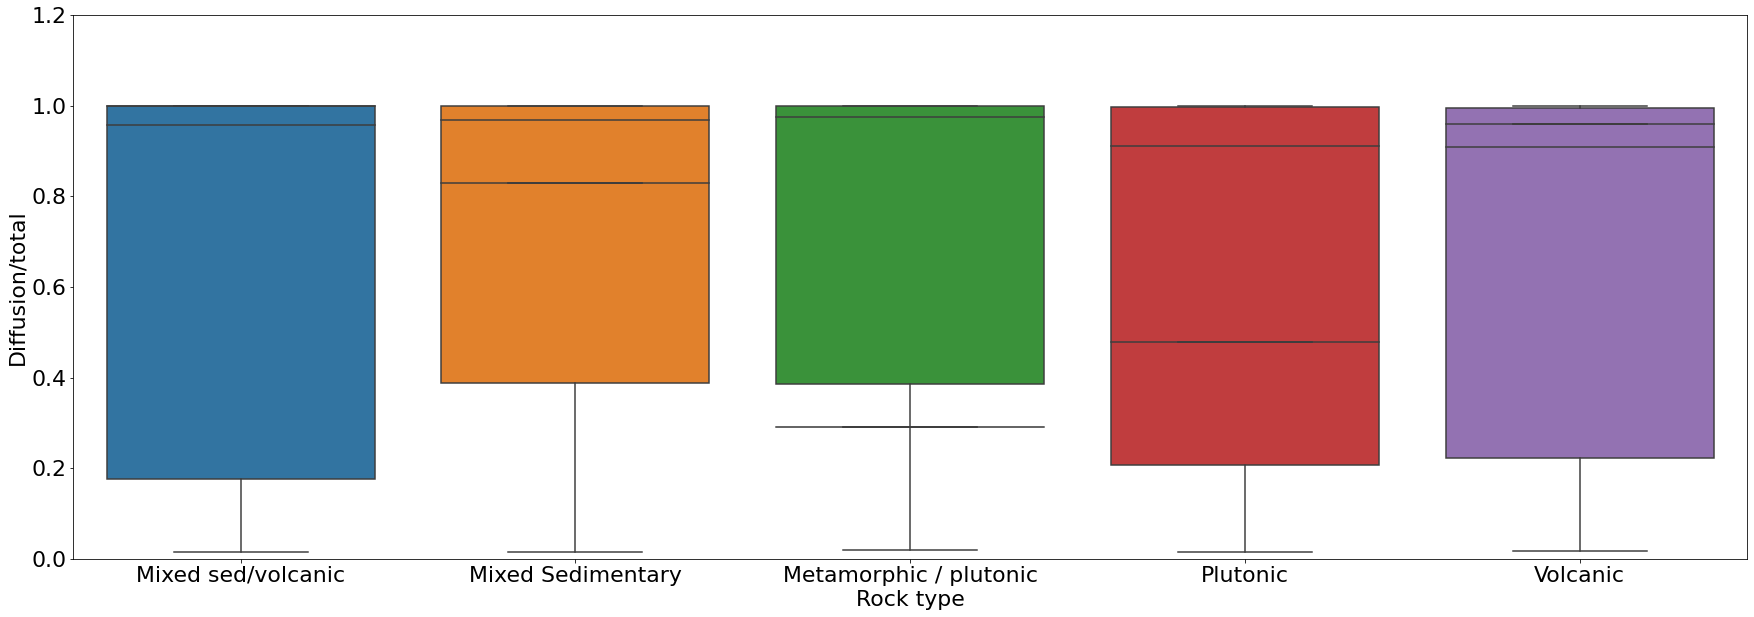

In [1993]:
## temp
fig,ax = plt.subplots(figsize=(30,10))
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
abox['classnm'] = np.nan
abox['classnm'][r == 146] = classes[0]
abox['classnm'][r == 167] = classes[1]
abox['classnm'][r == 252] = classes[2]
abox['classnm'][r == 255] = classes[3]
abox['classnm'][r == 96] = classes[4]
abox['classnm'][r == 253] = classes[5]
abox['classnm'][r == 176] = classes[6]
abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])


g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])

    g2 = g2.append(g)
    
g3 = g2[~g2['rbin2'].isna()]
g3['Rock type'] = g3['classnm']

ax2 =sns.boxplot(data=g3,x='Rock type',y='Diffusion/total')
for i,box in enumerate(ax2.artists):
    box.set_facecolor('red')
    box.set_alpha(.2)
    
g3 = g2[~g2['rbin'].isna()]
g3['Rock type'] = g3['classnm']
sns.boxplot(data=g3,x='Rock type',y='Diffusion/total')
#plt.yscale('log')


plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

Text(0.5, 0, 'Mean Annual Precipitation (mm/yr)')

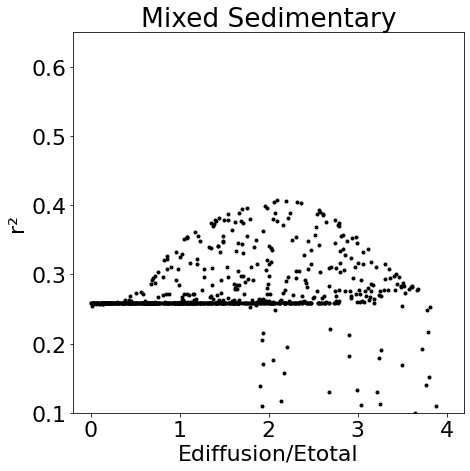

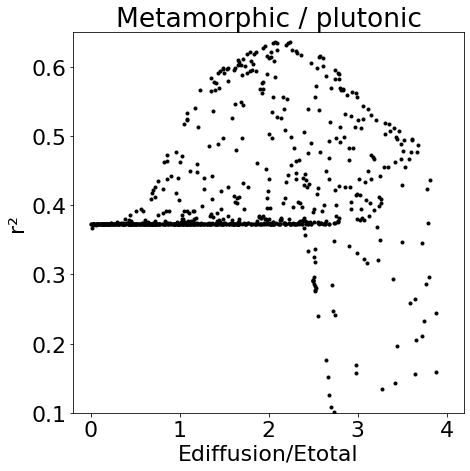

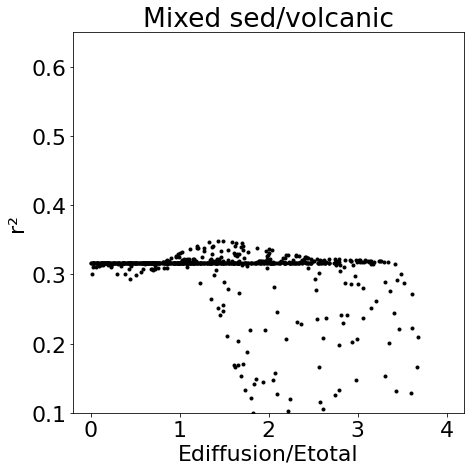

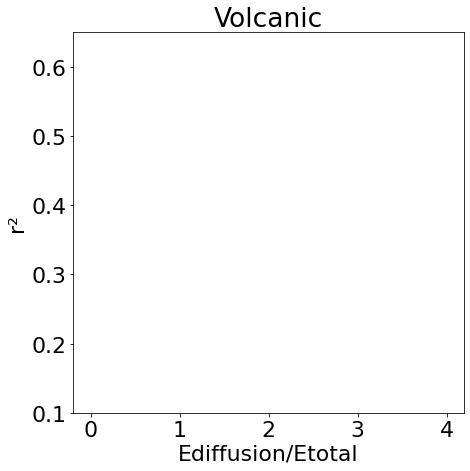

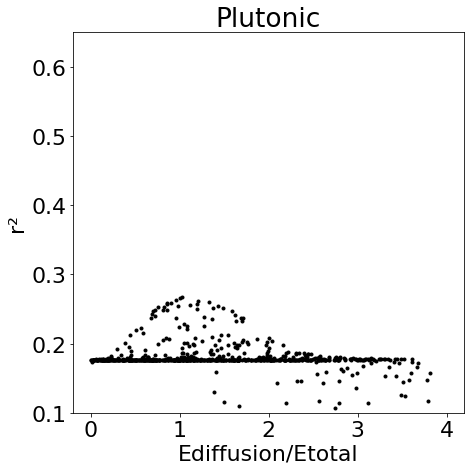

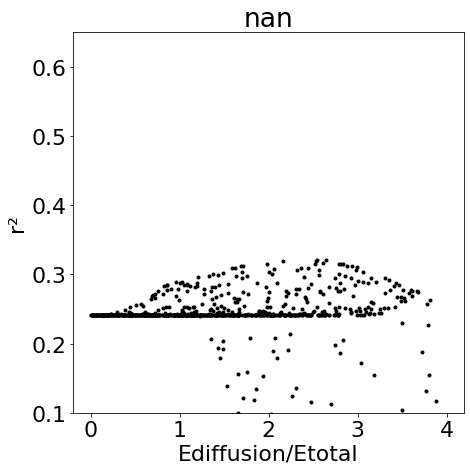

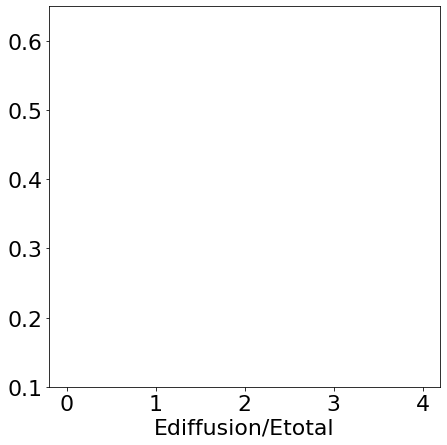

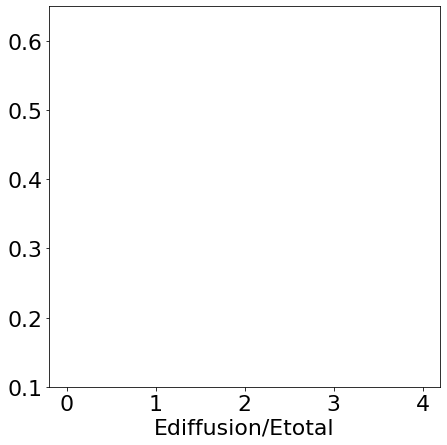

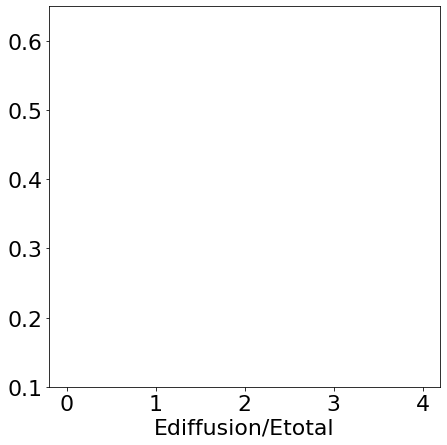

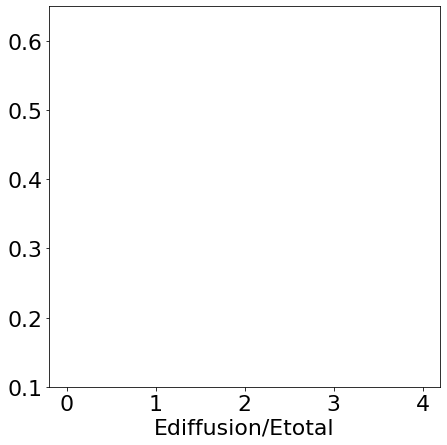

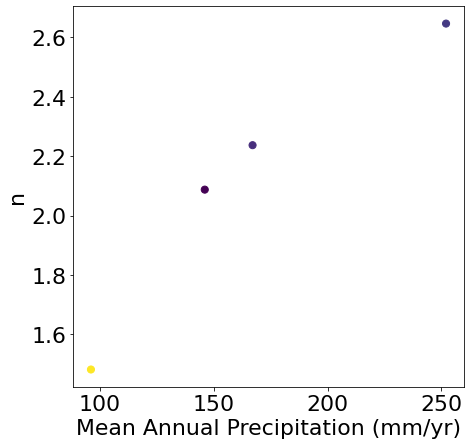

In [1992]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = mt#range(max(a['meantempclass']))
lo = np.zeros(len(codes))
var = ns
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
for i in range(len(codes)):
    
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    fig,ax = plt.subplots(figsize=(7,7))
    plt.plot(var,r2s[i], '.k')
    plt.ylim([.1, .65])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('Ediffusion/Etotal')
    #plt.xscale('log')
    try:
        plt.title(str(abox['classnm'].unique()[i]))
    except:
        continue
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>.3],lo[r2max>.3],c=mntemp[r2max>.3],s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

plt.ylabel('n')
#plt.yscale('log')
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')


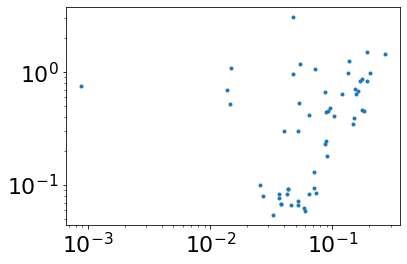

In [1591]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


In [1557]:
r2max[a['meantempclass']==1]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 3553

In [1704]:
slps1 = np.load('slpsall.npy')

<ipython-input-1820-e4a303034d1d>:8: RuntimeWarning: divide by zero encountered in log
  x = np.log(slps1[:len(a)])


Text(0.00630957344480193, 0.005011872336272725, 'slope = 1.7 ')

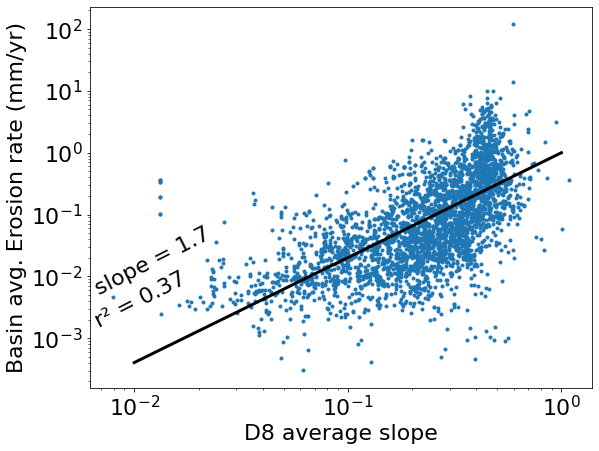

In [1820]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


In [1742]:
r21

0.19645284688850828

In [1529]:
a.index[a.geometry.centroid.x<100]

<ipython-input-1529-db1ddeb36946>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a.index[a.geometry.centroid.x<100]


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238],
           dtype='int64', length=2988)

In [1526]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][a.index[np.logical_and(a.geometry.centr

In [ ]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1023]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

In [135]:
len(drat[1])

3600

1.5705192050025845e-07

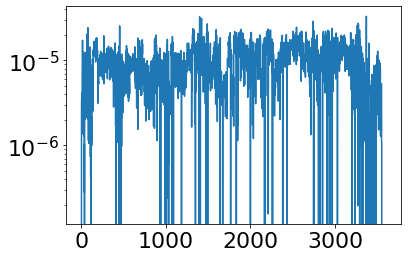

In [1001]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [122]:
folder = 'results/r_mn0'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [123]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [1224]:
folder = 'results/r_mn04_1'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [1225]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] - dfs_d[0][k]* diffus[i] / .01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k]* diffus[i] / .01)/eros1[k][i] 
            c+=1
    #return dfs


<ipython-input-1225-307cabf4ed07>:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k]* diffus[i] / .01)/eros1[k][i]


In [ ]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3500:
                print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
                


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

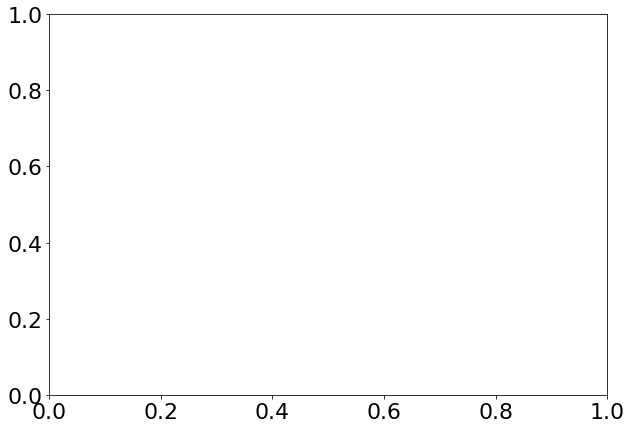

In [1227]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})

mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')
plt


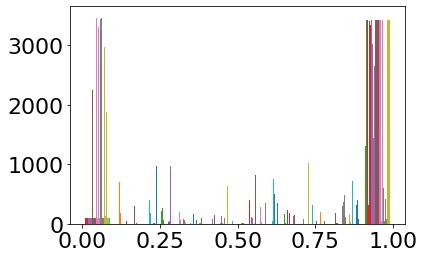

## Geologic 

In [1823]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [1824]:
geo = zn(a,'/users/gr_1/Documents/cosmo_predict/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]


/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [1839]:
a['meantempclass'] = major
a['meantempclass'] 

0       146.0
1       146.0
2       146.0
3       167.0
4       146.0
        ...  
3548    252.0
3549    252.0
3550    252.0
3551    252.0
3552    252.0
Name: meantempclass, Length: 3553, dtype: float64

In [2012]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2011]:
major[major == 146] = 1
major[major == 96] = 0 
major[major == 167]

,index,r2s,drat,n,class,dratave,meantempclass,D/k,Diffusion/total,classnm
0,0,0.308365,0,0.979967,146.0,0,0.0,8.692725e+00,0.970880,Mixed Sedimentary
1,1,-0.275657,0,3.665489,146.0,0,0.0,3.164878e+07,0.999353,Mixed Sedimentary
2,2,0.259130,0,1.165949,146.0,0,0.0,2.562350e+03,0.075927,Mixed Sedimentary
3,3,0.258096,0,2.473173,146.0,0,0.0,2.139897e+09,1.000000,Mixed Sedimentary
4,4,0.258682,0,2.168373,146.0,0,0.0,5.327158e+06,1.000000,Mixed Sedimentary
...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.000000,0,0.000000,0.0,0,NaN,NaN,NaN,NaN
9996,9996,0.000000,0,0.000000,0.0,0,NaN,NaN,NaN,NaN
9997,9997,0.000000,0,0.000000,0.0,0,NaN,NaN,NaN,NaN
9998,9998,0.000000,0,0.000000,0.0,0,NaN,NaN,NaN,NaN


<ipython-input-2007-8a0eacf29728>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

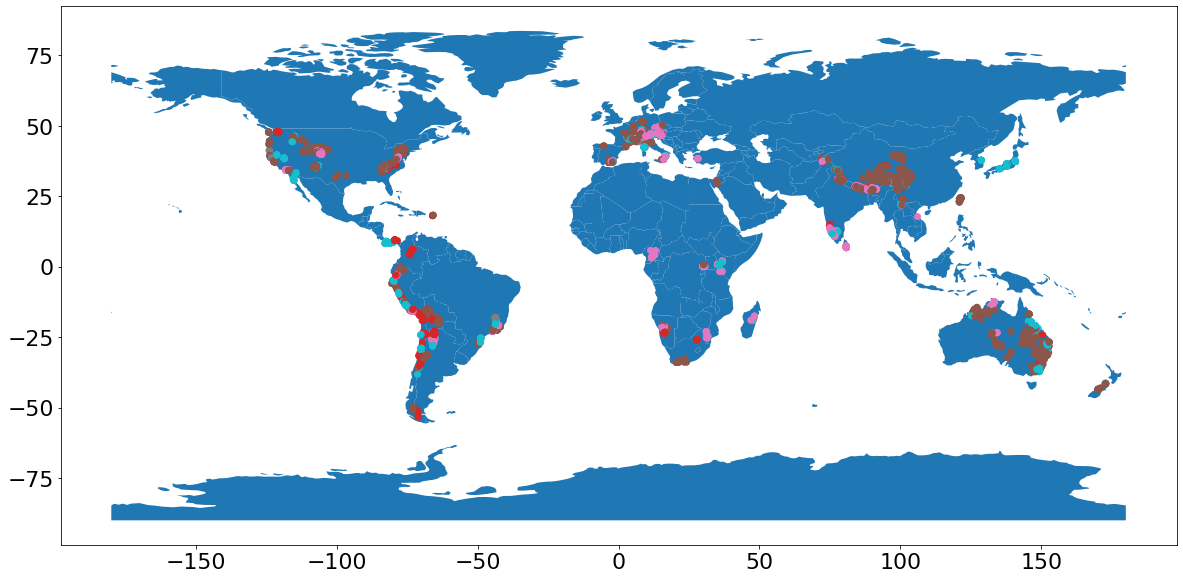

In [2007]:
from matplotlib.colors import ListedColormap
fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)
a['geo'] = major
a2 = a.copy()
a2.geometry = a.geometry.centroid
a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()))
#plt.imshow(f)

In [1598]:
f = rio.open('geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')